In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Datasets/advanced_data_2015_2024.csv")
df.columns.values

array(['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'Awards', 'Season'], dtype=object)

In [4]:
df.head()

Player   Age Team Pos     G    GS      MP   PER    TS%   3PAr  ...  \
0    James Harden  25.0  HOU  SG  81.0  81.0  2981.0  26.7  0.605  0.378  ...   
1  Andrew Wiggins  19.0  MIN  SF  82.0  82.0  2969.0  13.9  0.517  0.111  ...   
2    Trevor Ariza  29.0  HOU  SF  82.0  82.0  2930.0  12.7  0.539  0.610  ...   
3  Damian Lillard  24.0  POR  PG  82.0  82.0  2925.0  20.7  0.560  0.421  ...   
4      Chris Paul  29.0  LAC  PG  82.0  82.0  2857.0  26.0  0.596  0.298  ...   

    OWS  DWS    WS  WS/48  OBPM  DBPM  BPM  VORP                      Awards  \
0  12.2  4.2  16.4  0.265   7.0   1.8  8.8   8.1               MVP-2,AS,NBA1   
1   2.1  0.0   2.1  0.034  -0.4  -2.0 -2.4  -0.3                       ROY-1   
2   2.7  3.9   6.6  0.108  -0.1   1.1  1.0   2.2                     DPOY-13   
3   7.3  3.3  10.6  0.174   4.3   0.3  4.7   4.9                          AS   
4  12.9  3.2  16.1  0.270   6.4   1.6  8.0   7.2  MVP-6,DPOY-15,AS,NBA2,DEF1   

   Season  
0  2015.0  
1  2015.0  
2  2015.0  
3  2015.0  
4  2015.0  

[5 rows x 29 columns]

In [12]:
df['Pos'] = LabelEncoder().fit_transform(df['Pos'])

In [13]:
df.describe()

Age          Pos            G           GS           MP  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000   
mean     26.455964     2.049763    53.735190    25.742101  1245.837480   
std       4.258629     1.434835    18.716941    26.451746   711.546997   
min      19.000000     0.000000    21.000000     0.000000    49.000000   
25%      23.000000     1.000000    37.000000     3.000000   634.000000   
50%      26.000000     2.000000    56.000000    15.000000  1160.000000   
75%      29.000000     3.000000    70.000000    47.000000  1811.250000   
max      43.000000     4.000000    84.000000    83.000000  3125.000000   

               PER          TS%         3PAr          FTr         ORB%  ...  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000  ...   
mean     13.843720     0.551778     0.360690     0.251503     4.910723  ...   
std       4.615622     0.058497     0.211904     0.126640     3.821387  ...   
min      -3.900000     0.240000     0.000000     0.000000     0.000000  ...   
25%      10.700000     0.517000     0.219750     0.162000     2.000000  ...   
50%      13.300000     0.552000     0.378000     0.232000     3.500000  ...   
75%      16.400000     0.588000     0.509000     0.317000     6.900000  ...   
max      34.100000     0.780000     1.000000     1.219000    23.200000  ...   

              USG%          OWS          DWS           WS        WS/48  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000   
mean     18.744708     1.360387     1.253495     2.614277     0.090008   
std       5.239831     1.831164     0.972128     2.557074     0.058871   
min       5.200000    -3.300000    -0.500000    -2.100000    -0.222000   
25%      15.000000     0.200000     0.500000     0.800000     0.052000   
50%      18.000000     0.900000     1.000000     1.900000     0.088000   
75%      21.900000     2.100000     1.800000     3.700000     0.124000   
max      41.700000    13.800000     6.000000    17.900000     0.325000   

              OBPM         DBPM          BPM         VORP       Season  
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000  
mean     -0.743227    -0.044293    -0.788428     0.629246  2019.580569  
std       2.474191     1.191060     2.864266     1.253506     2.895750  
min     -12.400000    -4.000000   -16.100000    -2.000000  2015.000000  
25%      -2.300000    -0.900000    -2.600000    -0.100000  2017.000000  
50%      -0.900000    -0.100000    -1.000000     0.200000  2020.000000  
75%       0.600000     0.700000     0.700000     1.000000  2022.000000  
max      10.300000     5.000000    13.700000    10.600000  2024.000000  

[8 rows x 26 columns]

In [14]:
df = df[(df['G'] > 20) ]

In [7]:
df.describe()

Age            G           GS           MP          PER  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000   
mean     26.455964    53.735190    25.742101  1245.837480    13.843720   
std       4.258629    18.716941    26.451746   711.546997     4.615622   
min      19.000000    21.000000     0.000000    49.000000    -3.900000   
25%      23.000000    37.000000     3.000000   634.000000    10.700000   
50%      26.000000    56.000000    15.000000  1160.000000    13.300000   
75%      29.000000    70.000000    47.000000  1811.250000    16.400000   
max      43.000000    84.000000    83.000000  3125.000000    34.100000   

               TS%         3PAr          FTr         ORB%         DRB%  ...  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000  ...   
mean      0.551778     0.360690     0.251503     4.910723    15.152903  ...   
std       0.058497     0.211904     0.126640     3.821387     6.022945  ...   
min       0.240000     0.000000     0.000000     0.000000     2.100000  ...   
25%       0.517000     0.219750     0.162000     2.000000    10.600000  ...   
50%       0.552000     0.378000     0.232000     3.500000    13.800000  ...   
75%       0.588000     0.509000     0.317000     6.900000    18.800000  ...   
max       0.780000     1.000000     1.219000    23.200000    40.200000  ...   

              USG%          OWS          DWS           WS        WS/48  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000   
mean     18.744708     1.360387     1.253495     2.614277     0.090008   
std       5.239831     1.831164     0.972128     2.557074     0.058871   
min       5.200000    -3.300000    -0.500000    -2.100000    -0.222000   
25%      15.000000     0.200000     0.500000     0.800000     0.052000   
50%      18.000000     0.900000     1.000000     1.900000     0.088000   
75%      21.900000     2.100000     1.800000     3.700000     0.124000   
max      41.700000    13.800000     6.000000    17.900000     0.325000   

              OBPM         DBPM          BPM         VORP       Season  
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000  
mean     -0.743227    -0.044293    -0.788428     0.629246  2019.580569  
std       2.474191     1.191060     2.864266     1.253506     2.895750  
min     -12.400000    -4.000000   -16.100000    -2.000000  2015.000000  
25%      -2.300000    -0.900000    -2.600000    -0.100000  2017.000000  
50%      -0.900000    -0.100000    -1.000000     0.200000  2020.000000  
75%       0.600000     0.700000     0.700000     1.000000  2022.000000  
max      10.300000     5.000000    13.700000    10.600000  2024.000000  

[8 rows x 25 columns]

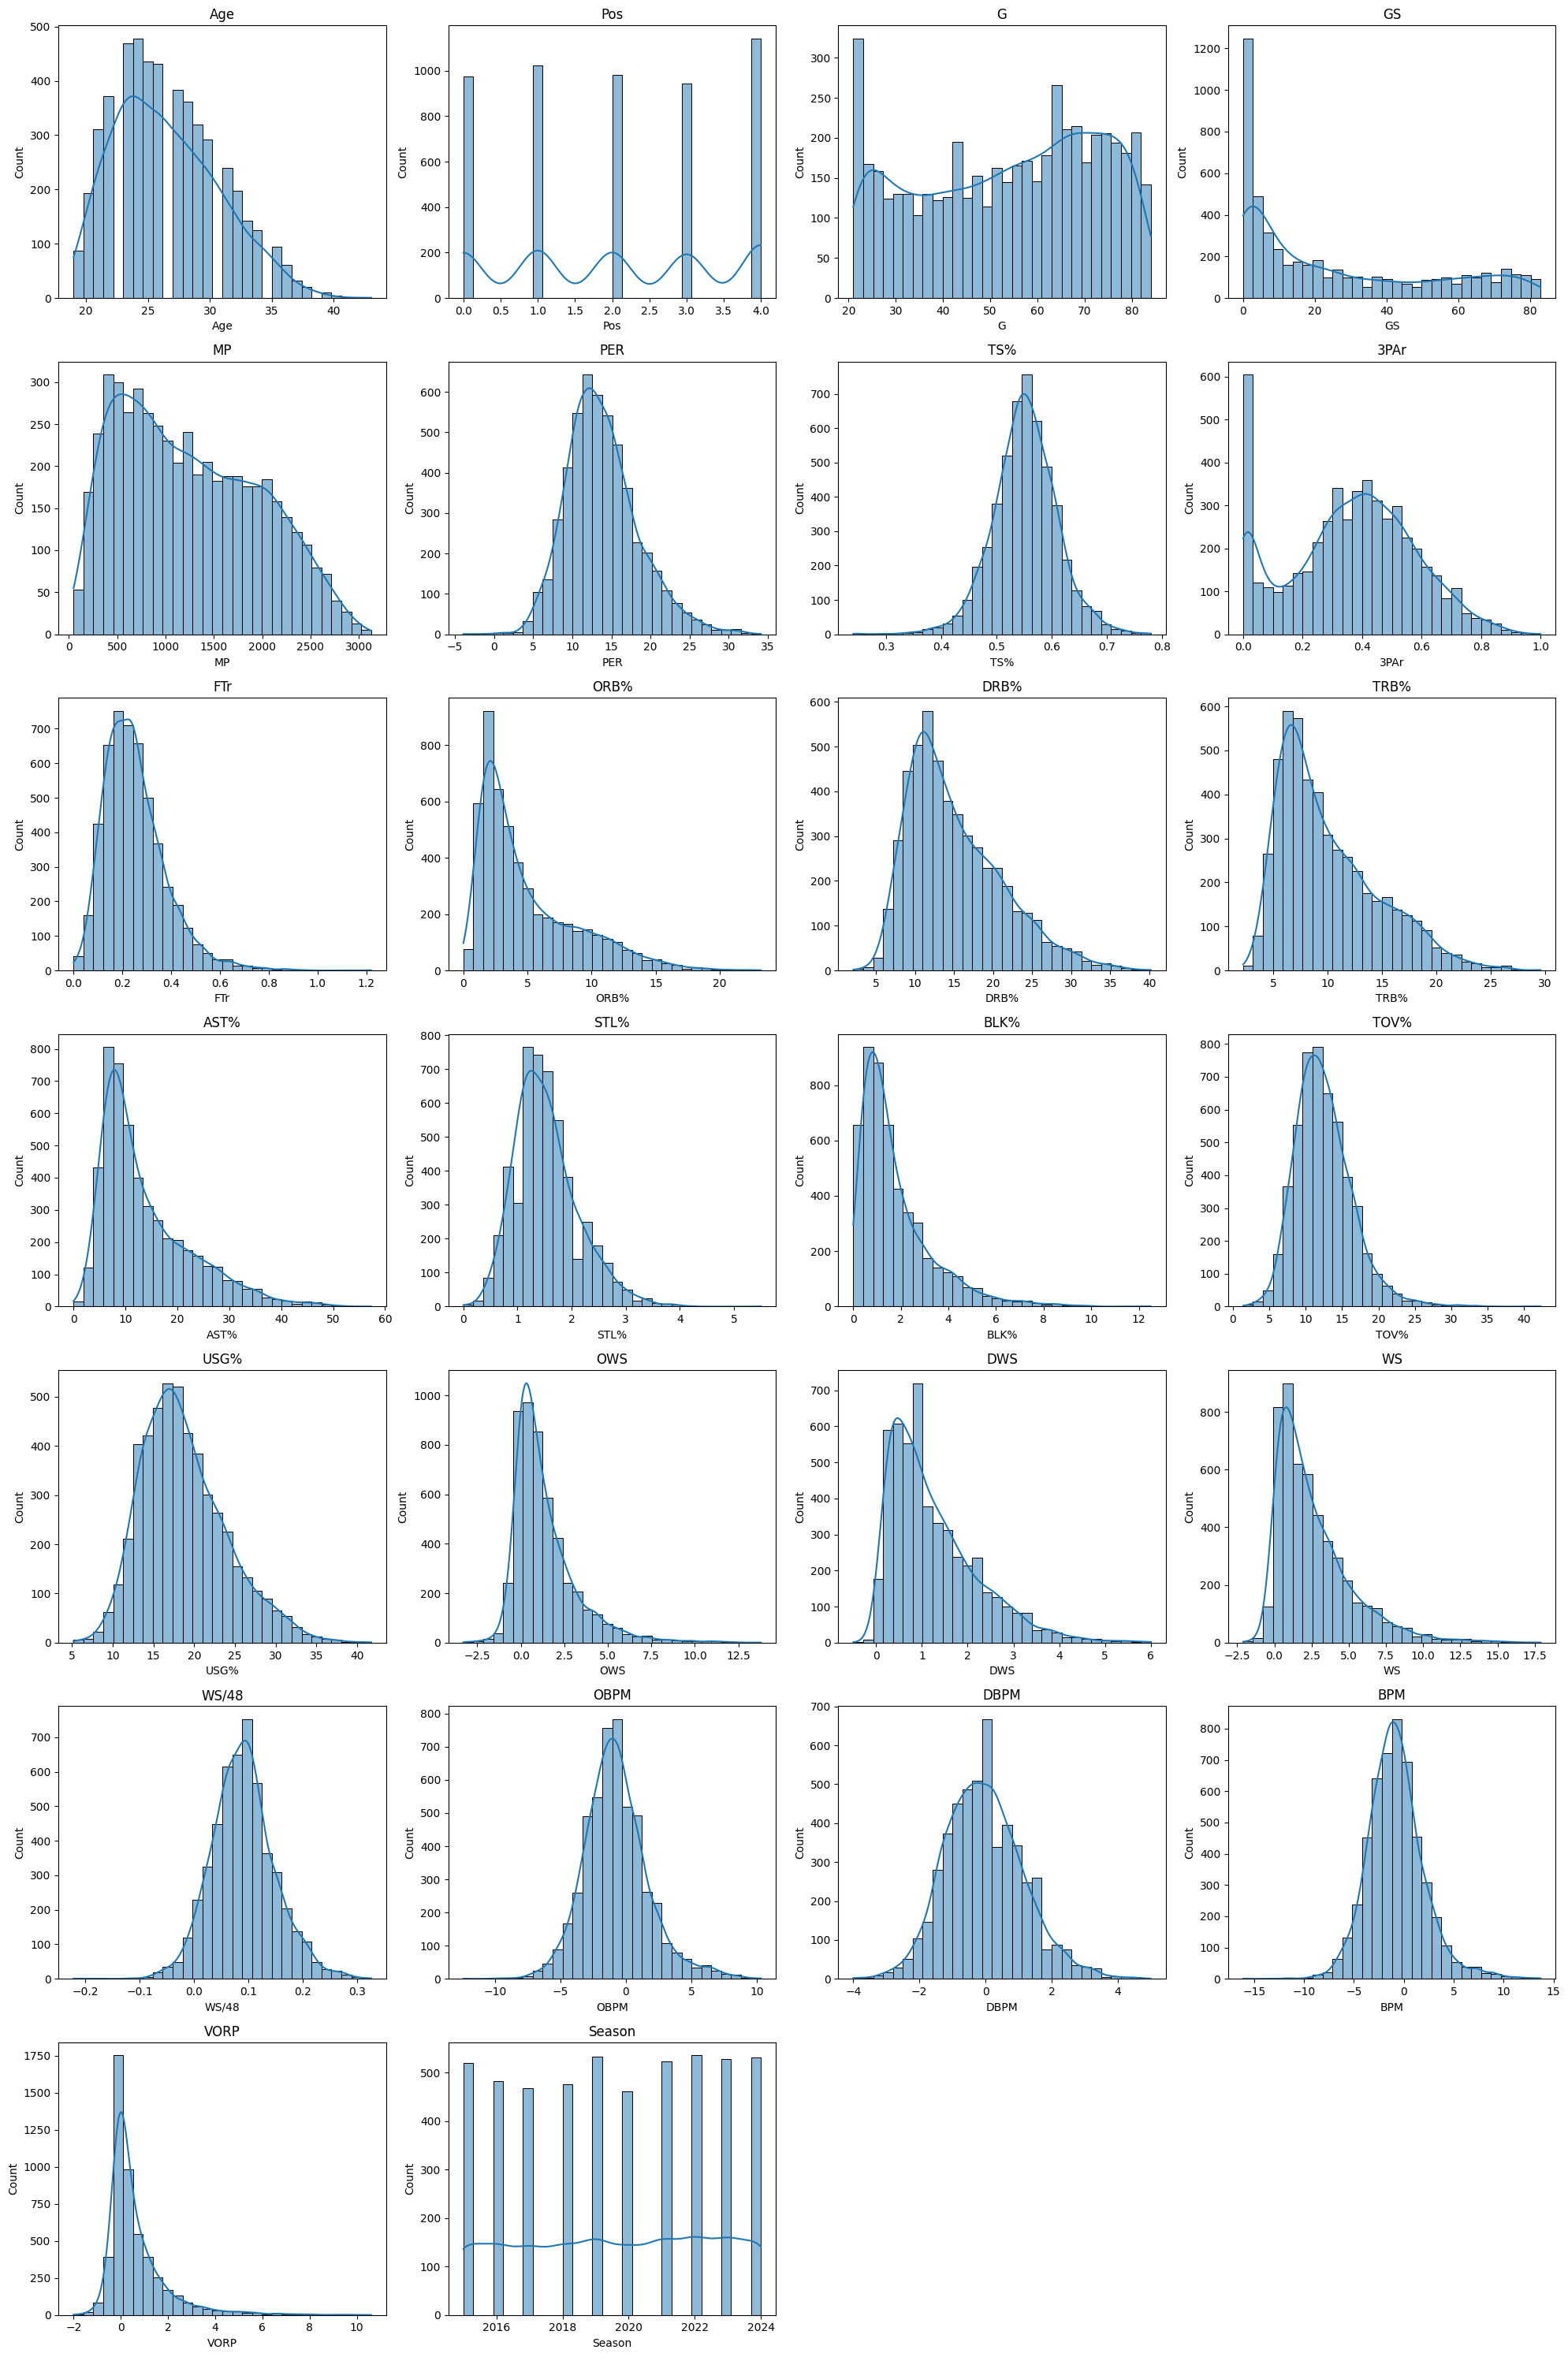

In [15]:
# Distribution plots for all numerical features in df
num_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 30))
for idx, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 3) // 4, 4, idx)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
dataset = df[[ 'Pos','GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP']]

In [194]:
dataset.describe()


GS           MP          PER          TS%         3PAr  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000   
mean     25.742101  1245.837480    13.843720     0.551778     0.360690   
std      26.451746   711.546997     4.615622     0.058497     0.211904   
min       0.000000    49.000000    -3.900000     0.240000     0.000000   
25%       3.000000   634.000000    10.700000     0.517000     0.219750   
50%      15.000000  1160.000000    13.300000     0.552000     0.378000   
75%      47.000000  1811.250000    16.400000     0.588000     0.509000   
max      83.000000  3125.000000    34.100000     0.780000     1.000000   

               FTr         ORB%         DRB%         TRB%         AST%  ...  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000  ...   
mean      0.251503     4.910723    15.152903    10.027765    13.816884  ...   
std       0.126640     3.821387     6.022945     4.558286     8.748630  ...   
min       0.000000     0.000000     2.100000     2.200000     0.000000  ...   
25%       0.162000     2.000000    10.600000     6.500000     7.400000  ...   
50%       0.232000     3.500000    13.800000     8.800000    10.900000  ...   
75%       0.317000     6.900000    18.800000    12.700000    18.200000  ...   
max       1.219000    23.200000    40.200000    29.600000    57.300000  ...   

              TOV%         USG%          OWS          DWS           WS  \
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000   
mean     12.489119    18.744708     1.360387     1.253495     2.614277   
std       3.974613     5.239831     1.831164     0.972128     2.557074   
min       1.400000     5.200000    -3.300000    -0.500000    -2.100000   
25%       9.800000    15.000000     0.200000     0.500000     0.800000   
50%      12.000000    18.000000     0.900000     1.000000     1.900000   
75%      14.700000    21.900000     2.100000     1.800000     3.700000   
max      42.300000    41.700000    13.800000     6.000000    17.900000   

             WS/48         OBPM         DBPM          BPM         VORP  
count  5064.000000  5064.000000  5064.000000  5064.000000  5064.000000  
mean      0.090008    -0.743227    -0.044293    -0.788428     0.629246  
std       0.058871     2.474191     1.191060     2.864266     1.253506  
min      -0.222000   -12.400000    -4.000000   -16.100000    -2.000000  
25%       0.052000    -2.300000    -0.900000    -2.600000    -0.100000  
50%       0.088000    -0.900000    -0.100000    -1.000000     0.200000  
75%       0.124000     0.600000     0.700000     0.700000     1.000000  
max       0.325000    10.300000     5.000000    13.700000    10.600000  

[8 rows x 22 columns]

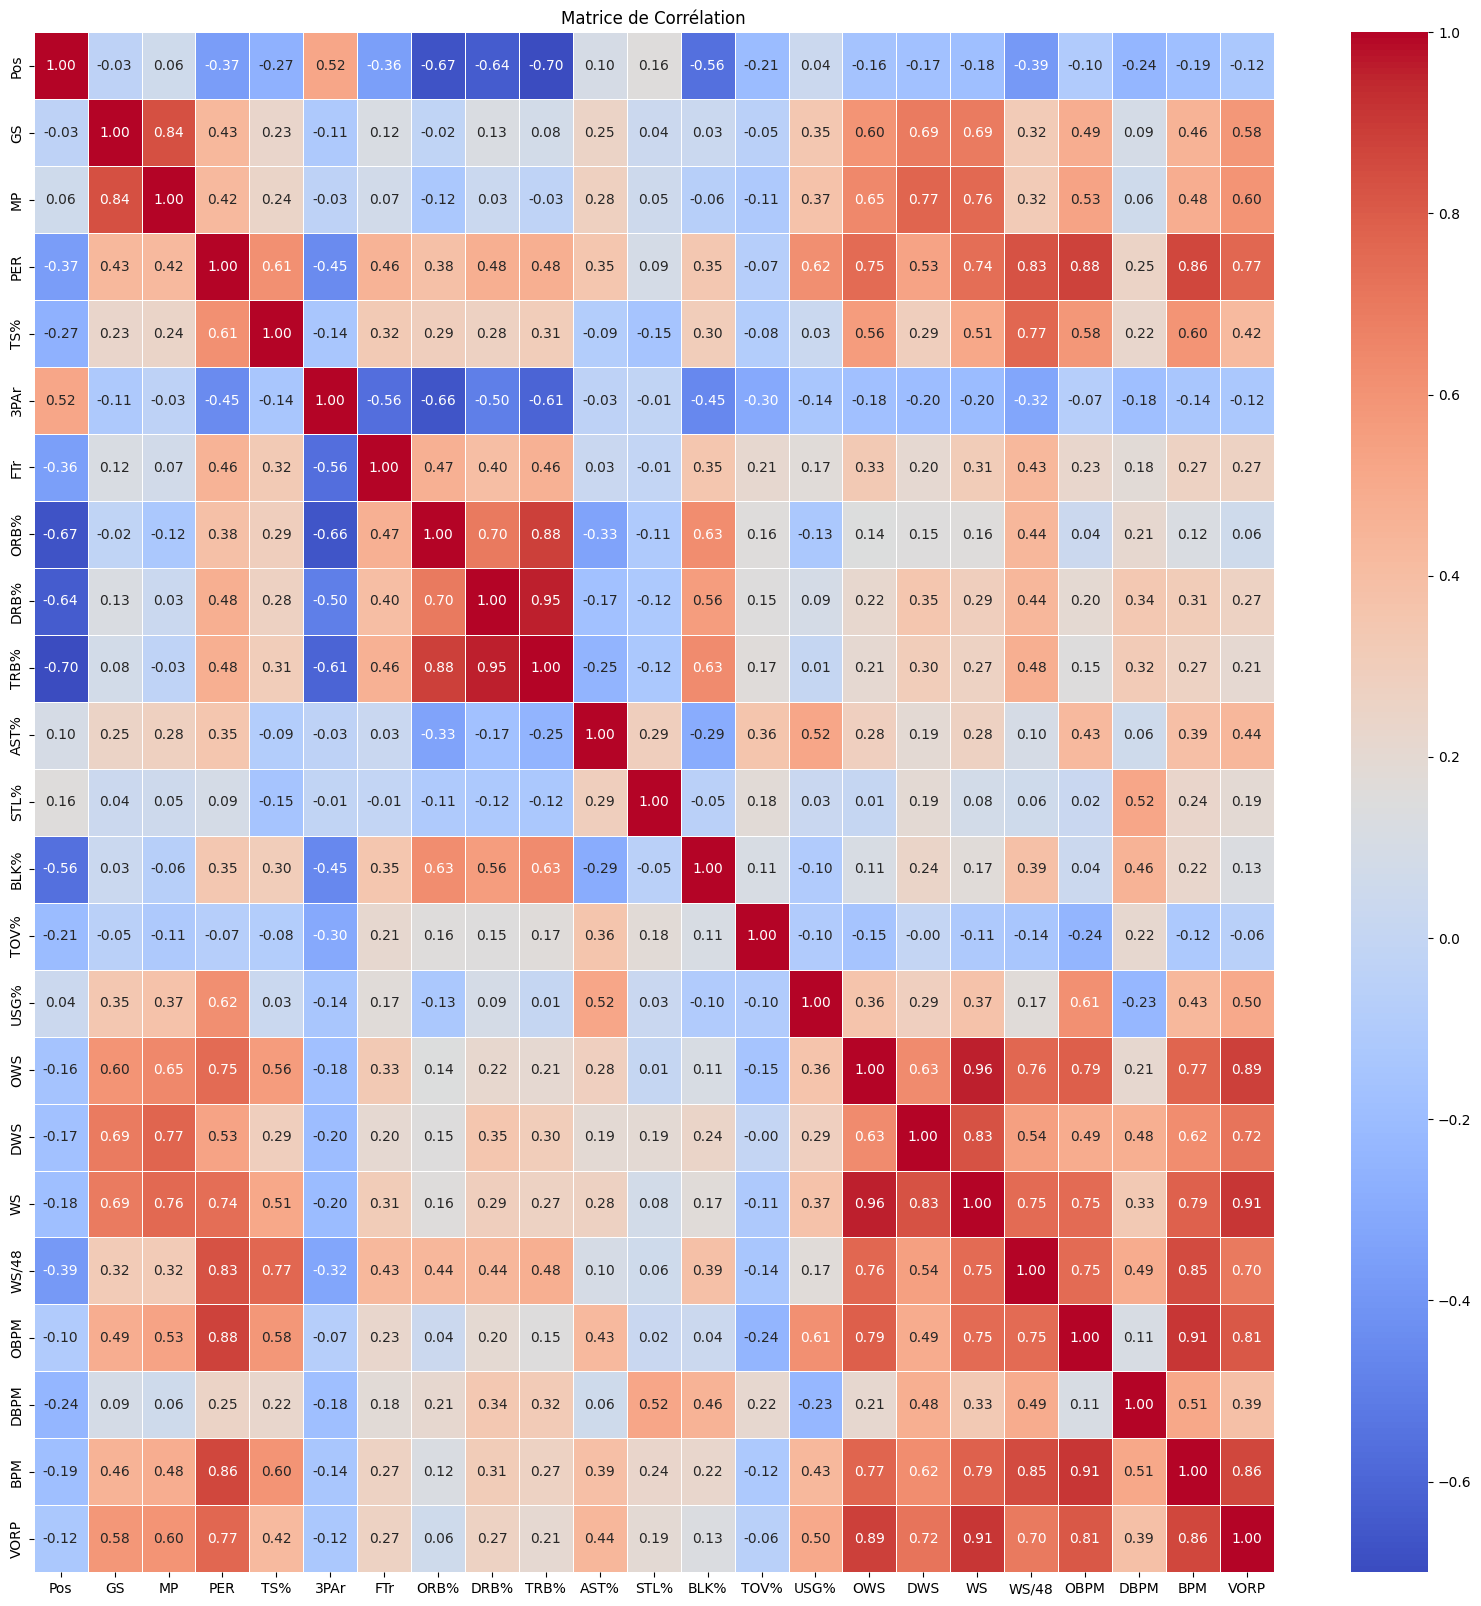

In [18]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [19]:
dataset_standarded = StandardScaler().fit_transform(dataset)


In [20]:
dataset_standarded = pd.DataFrame(dataset_standarded, columns=dataset.columns)
dataset_standarded.describe()

Pos            GS            MP           PER           TS%  \
count  5.064000e+03  5.064000e+03  5.064000e+03  5.064000e+03  5.064000e+03   
mean   1.999454e-17 -4.490001e-17 -3.367501e-17 -3.844564e-16 -1.302100e-15   
std    1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00   
min   -1.428712e+00 -9.732682e-01 -1.682188e+00 -3.844655e+00 -5.330289e+00   
25%   -7.316985e-01 -8.598429e-01 -8.599543e-01 -6.811717e-01 -5.945740e-01   
50%   -3.468548e-02 -4.061419e-01 -1.206469e-01 -1.178117e-01  3.801460e-03   
75%    6.623276e-01  8.037276e-01  7.947027e-01  5.538868e-01  6.192734e-01   
max    1.359341e+00  2.164831e+00  2.641214e+00  4.389069e+00  3.901790e+00   

               3PAr           FTr          ORB%          DRB%          TRB%  \
count  5.064000e+03  5.064000e+03  5.064000e+03  5.064000e+03  5.064000e+03   
mean  -1.459250e-16 -1.683751e-17 -6.173752e-17  4.026970e-16  5.612502e-18   
std    1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00   
min   -1.702309e+00 -1.986159e+00 -1.285190e+00 -2.167410e+00 -1.717430e+00   
25%   -6.651790e-01 -7.068172e-01 -7.617679e-01 -7.560010e-01 -7.740000e-01   
50%    8.169627e-02 -1.540151e-01 -3.692015e-01 -2.246470e-01 -2.693745e-01   
75%    6.999627e-01  5.172445e-01  5.206156e-01  6.055937e-01  5.862948e-01   
max    3.017282e+00  7.640494e+00  4.786504e+00  4.159024e+00  4.294195e+00   

       ...          TOV%          USG%           OWS           DWS  \
count  ...  5.064000e+03  5.064000e+03  5.064000e+03  5.064000e+03   
mean   ...  1.122500e-16 -1.234750e-16  2.245001e-17 -1.347000e-16   
std    ...  1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00   
min    ... -2.790263e+00 -2.585207e+00 -2.545292e+00 -1.803949e+00   
25%    ... -6.766407e-01 -7.147325e-01 -6.337509e-01 -7.751756e-01   
50%    ... -1.230730e-01 -1.421384e-01 -2.514426e-01 -2.607891e-01   
75%    ...  5.563055e-01  6.022339e-01  4.039431e-01  5.622293e-01   
max    ...  7.501063e+00  4.381355e+00  6.793953e+00  4.883076e+00   

                 WS         WS/48          OBPM          DBPM           BPM  \
count  5.064000e+03  5.064000e+03  5.064000e+03  5.064000e+03  5.064000e+03   
mean  -3.367501e-17 -1.066375e-16  2.104688e-17 -2.806251e-18  2.806251e-18   
std    1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00  1.000099e+00   
min   -1.843804e+00 -5.300403e+00 -4.711813e+00 -3.321493e+00 -5.346250e+00   
25%   -7.095830e-01 -6.456856e-01 -6.292671e-01 -7.185124e-01 -6.325357e-01   
50%   -2.793614e-01 -3.411693e-02 -6.336972e-02 -4.677551e-02 -7.387329e-02   
75%    4.246376e-01  5.774517e-01  5.429489e-01  6.249613e-01  5.197055e-01   
max    5.978408e+00  3.992043e+00  4.463809e+00  4.235547e+00  5.058838e+00   

               VORP  
count  5.064000e+03  
mean  -5.612502e-18  
std    1.000099e+00  
min   -2.097720e+00  
25%   -5.818222e-01  
50%   -3.424698e-01  
75%    2.958031e-01  
max    7.955078e+00  

[8 rows x 23 columns]

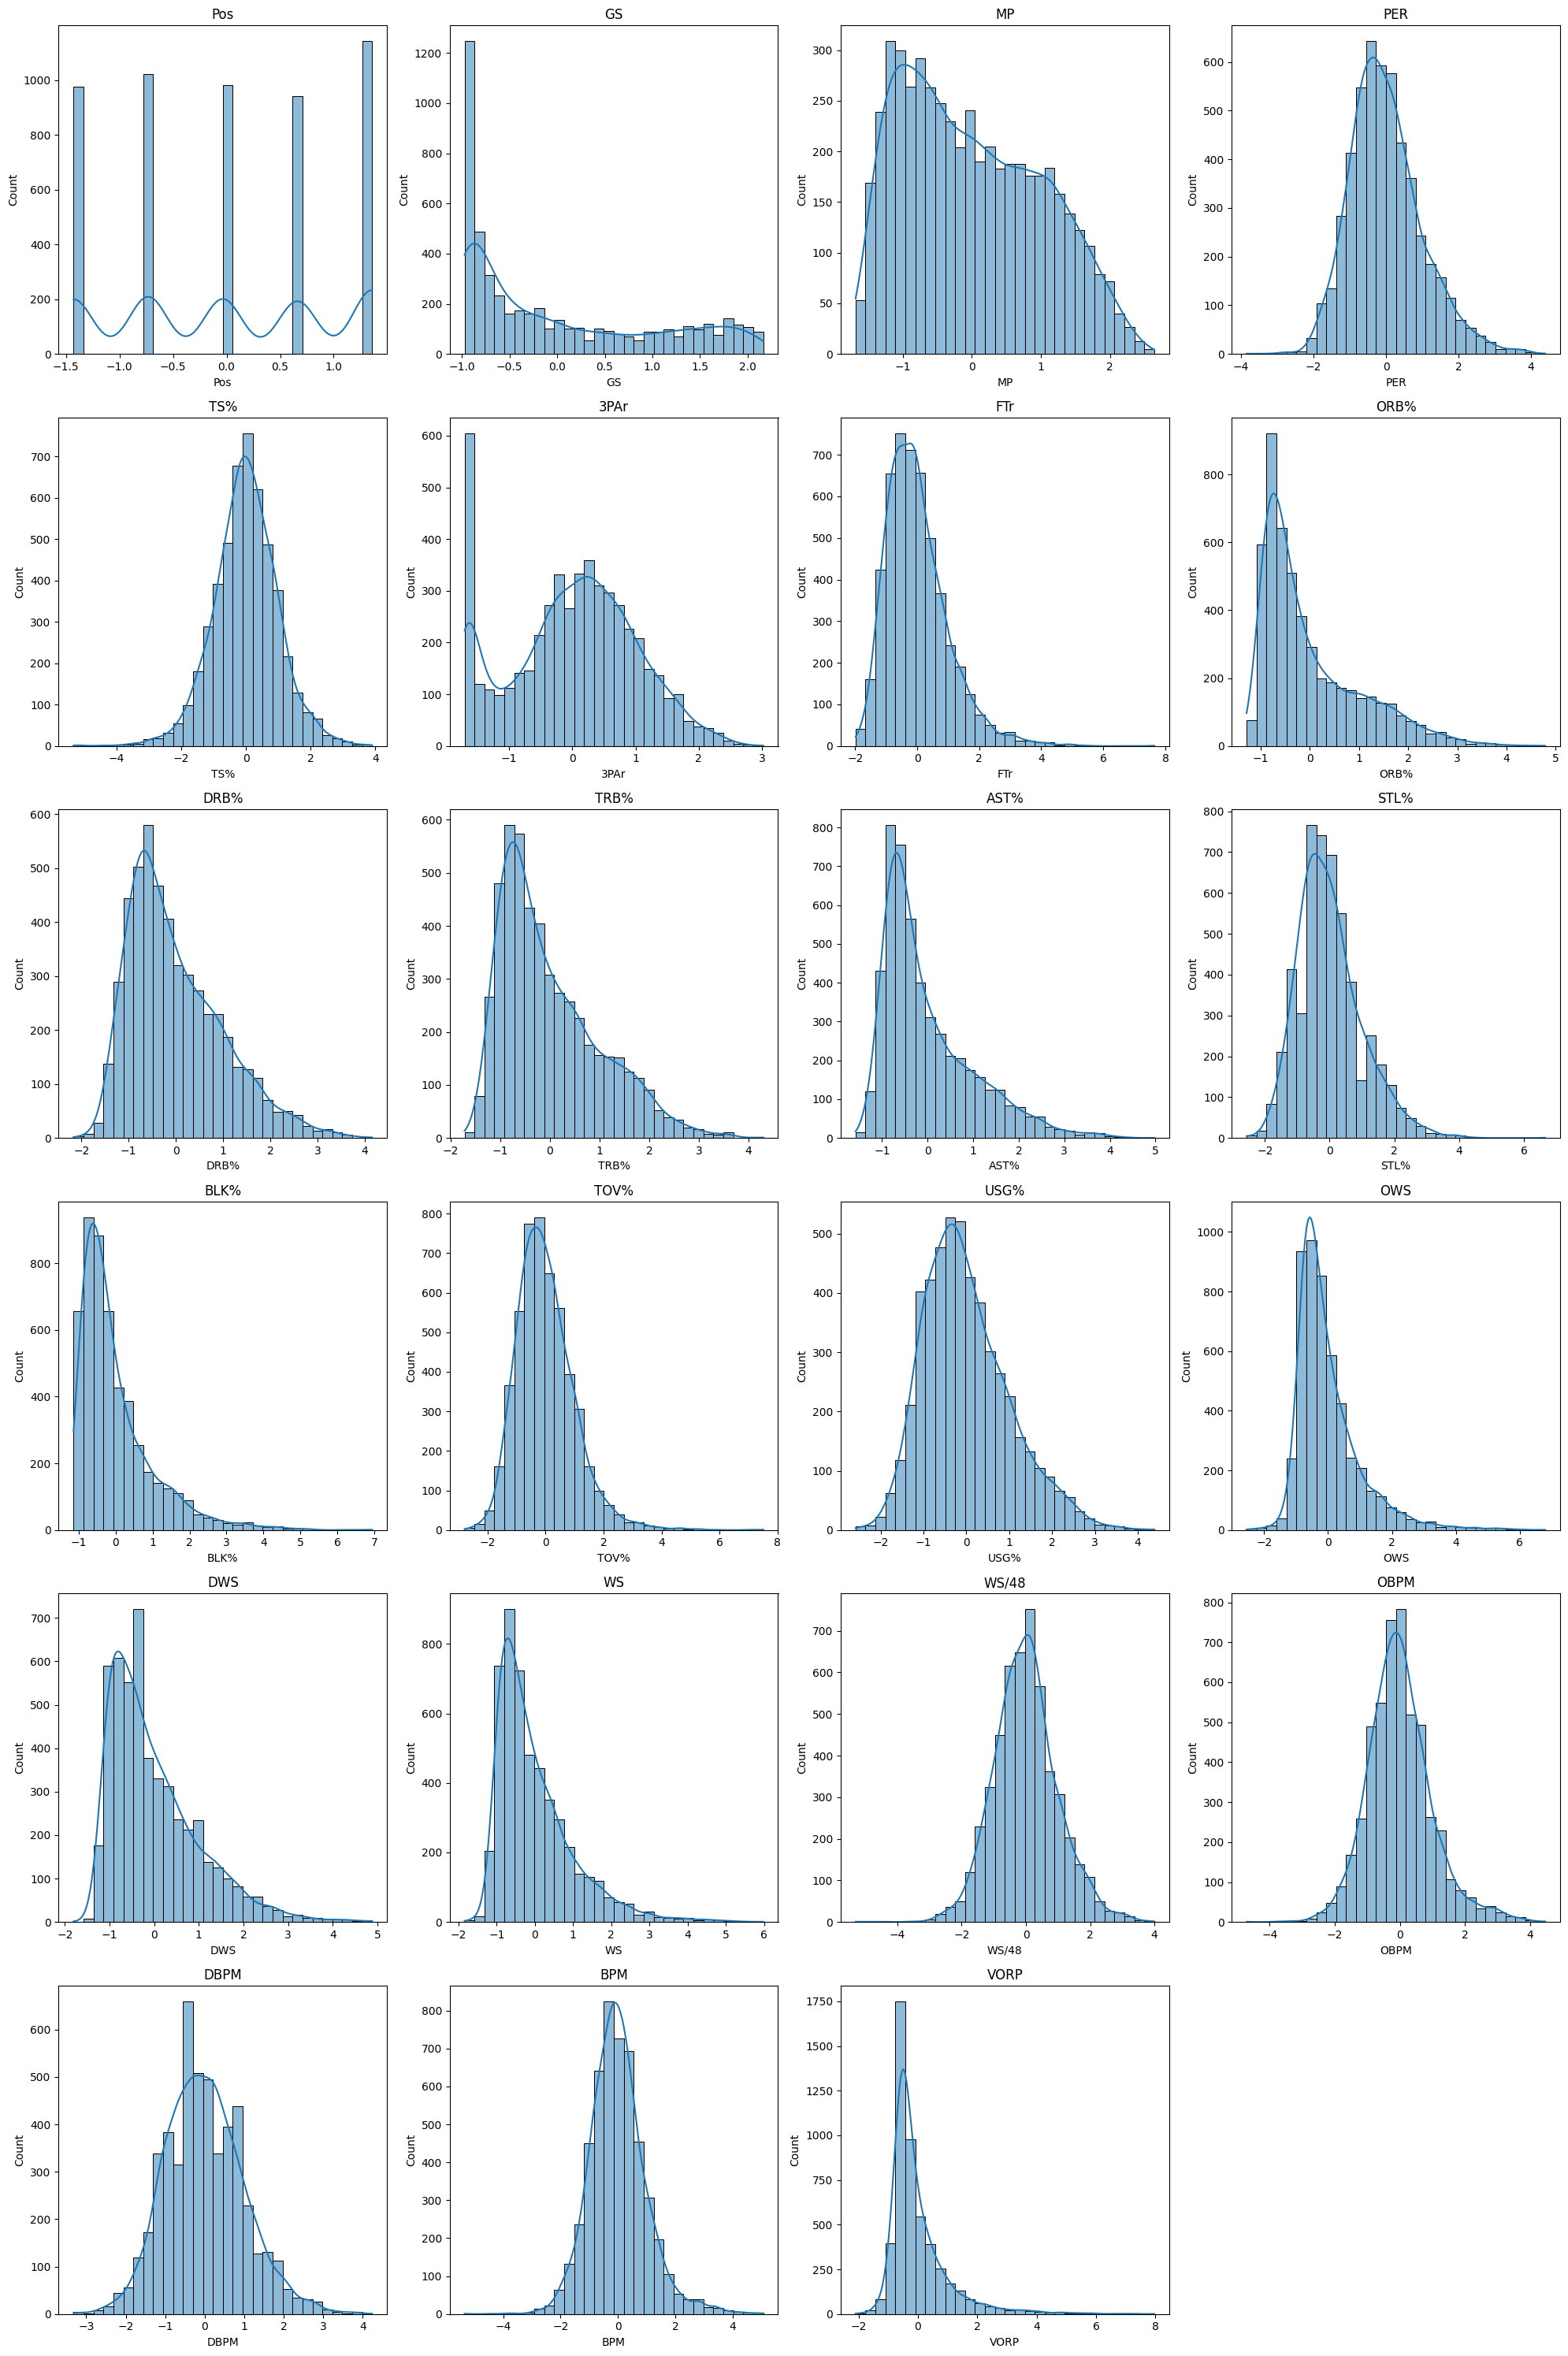

In [21]:
num_cols = dataset_standarded.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 30))
for idx, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 3) // 4, 4, idx)
    sns.histplot(dataset_standarded[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [22]:
pca = PCA(n_components=5)

PCA_dimensions = pca.fit(dataset_standarded)
print(PCA_dimensions.explained_variance_ratio_)

[0.39032326 0.19600652 0.08288259 0.0722176  0.0625196 ]


In [200]:
PCA_dimensions = pca.transform(dataset)
PCA_dimensions = pd.DataFrame(PCA_dimensions, columns=[f'PC{i+1}' for i in range(PCA_dimensions.shape[1])])

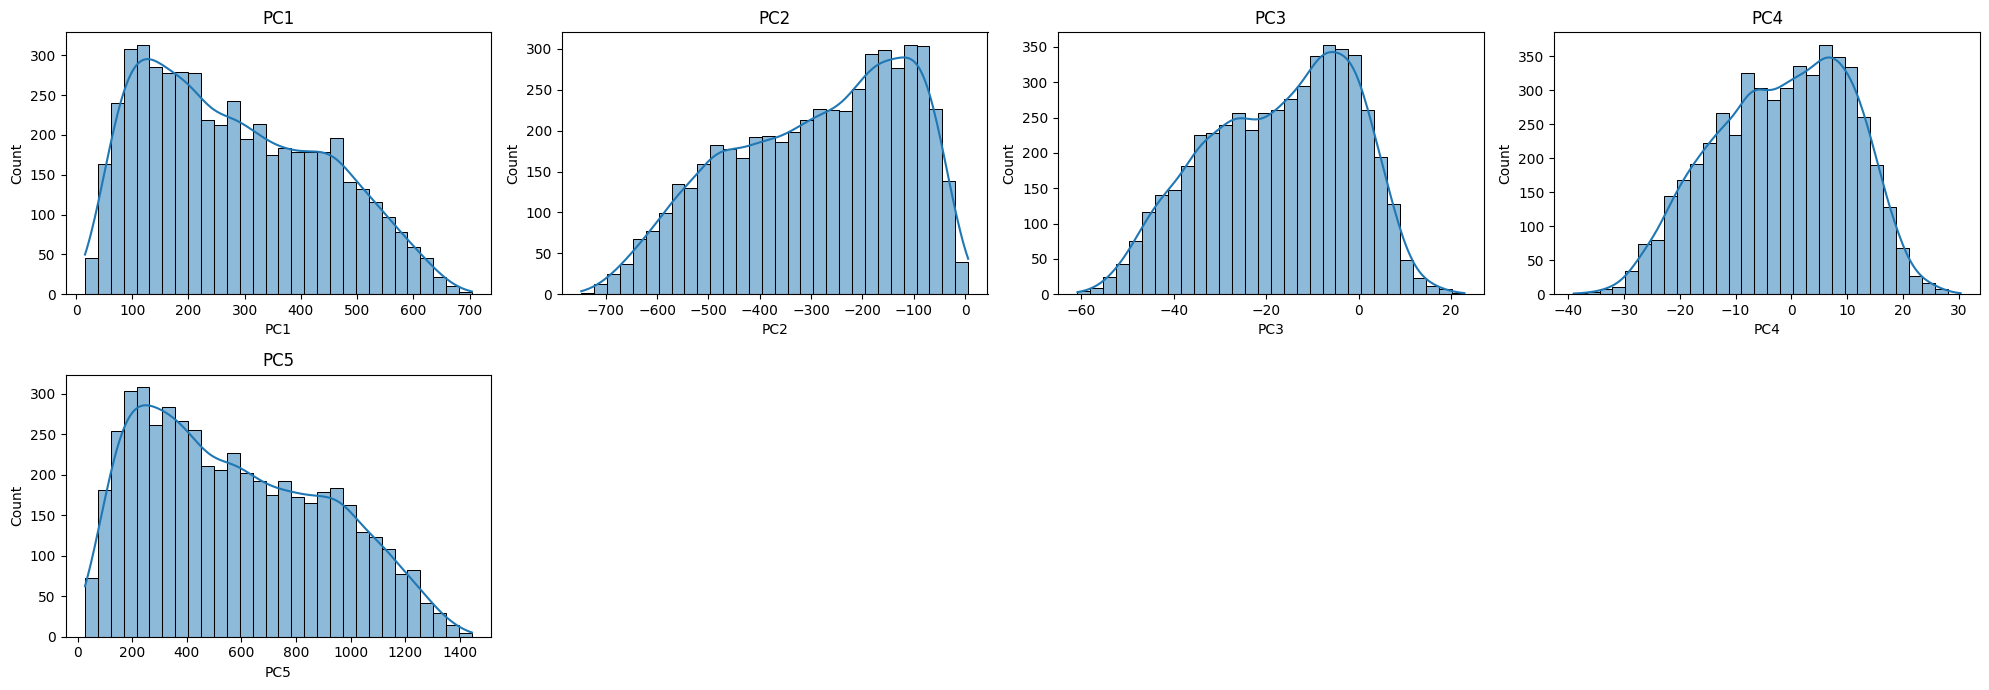

In [201]:
num_cols = PCA_dimensions.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 7))
for idx, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 3) // 4, 4, idx)
    sns.histplot(PCA_dimensions[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

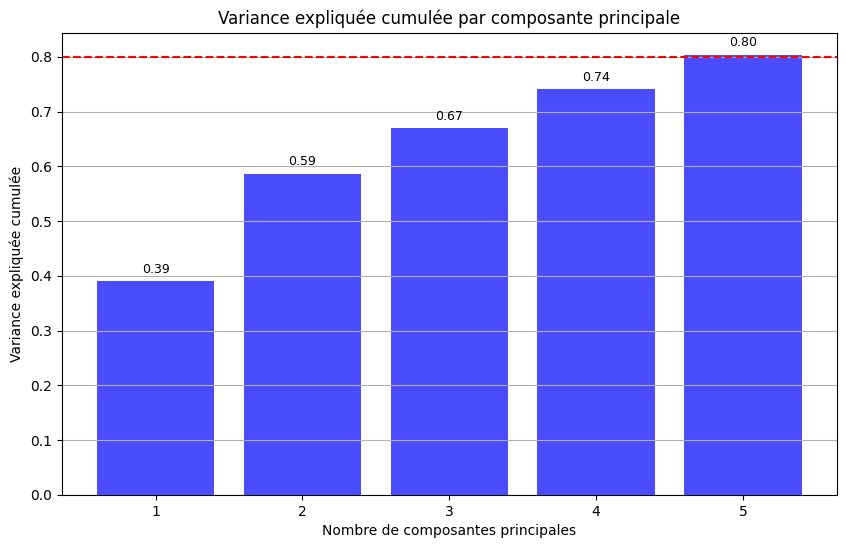

In [23]:
variance_explained = pca.explained_variance_ratio_
variance_explained_cumulative = np.cumsum(variance_explained)

# Création du graphique de la variance expliquée cumulée
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(variance_explained_cumulative) + 1), 
       variance_explained_cumulative, 
       alpha=0.7, 
       color='b')

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, 
            bar.get_height() + 0.01, 
            f'{variance_explained_cumulative[i]:.2f}', 
            ha='center', va='bottom',
            fontsize=9)

plt.grid(True, axis='y')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par composante principale')

# Ligne horizontale à 0.8 (80%) pour aider à la décision
plt.axhline(y=0.8, color='r', linestyle='--', label='Seuil de 80%')

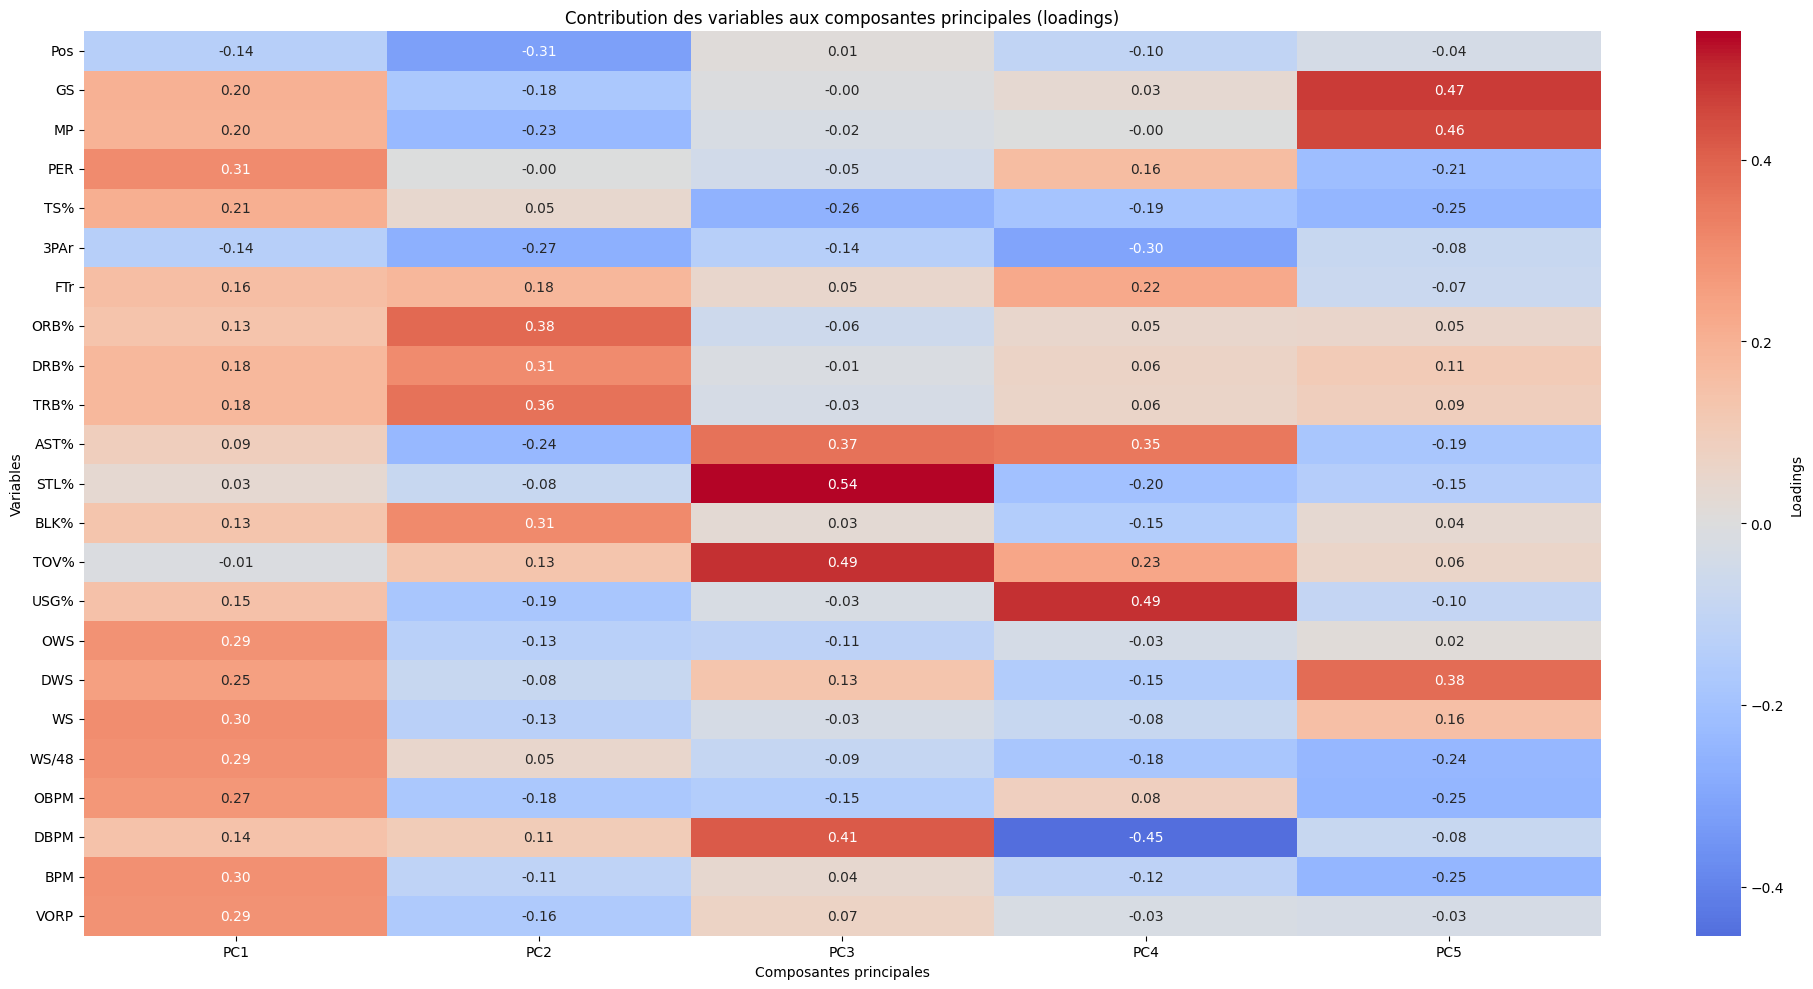

In [24]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=dataset.columns,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Créer la heatmap avec les loadings directement (avec signe + ou -)
plt.figure(figsize=(20, 10))
sns.heatmap(loadings, annot=True, cmap="coolwarm", fmt=".2f", center=0,
            cbar_kws={'label': 'Loadings'})
plt.title("Contribution des variables aux composantes principales (loadings)")
plt.ylabel("Variables")
plt.xlabel("Composantes principales")
plt.tight_layout()
plt.show()

In [25]:
pca_scores = pca.transform(dataset_standarded)

In [26]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_scores)
    inertia.append(kmeans.inertia_)

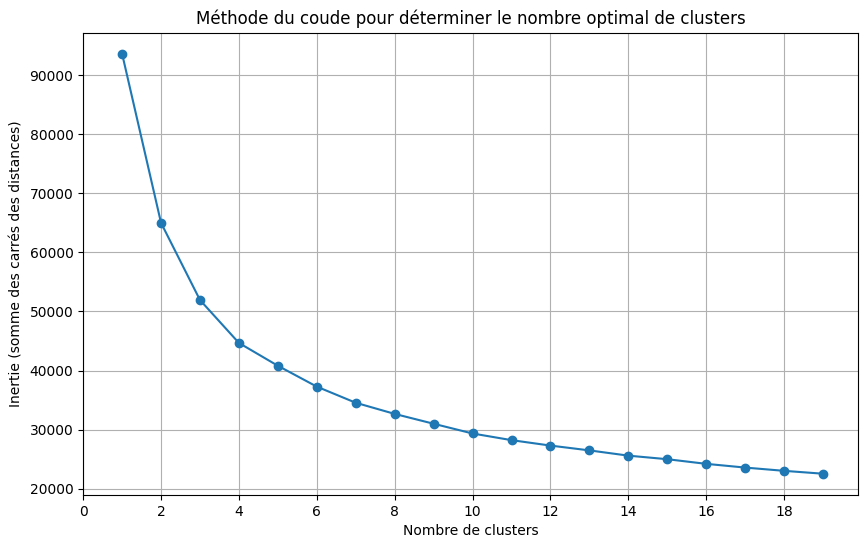

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.xticks(range(0,len(inertia),2))
plt.ylabel('Inertie (somme des carrés des distances)')
plt.title("Méthode du coude pour déterminer le nombre optimal de clusters")
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(pca_scores)

In [30]:
for i in range(3,15):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(pca_scores)
    silhouette_avg = silhouette_score(pca_scores, labels)
    print(f"Pour {i} clusters, le score de silhouette est : {silhouette_avg:.4f}")


Pour 3 clusters, le score de silhouette est : 0.3019
Pour 4 clusters, le score de silhouette est : 0.2289
Pour 5 clusters, le score de silhouette est : 0.1901
Pour 6 clusters, le score de silhouette est : 0.1922
Pour 7 clusters, le score de silhouette est : 0.1946
Pour 8 clusters, le score de silhouette est : 0.1902
Pour 9 clusters, le score de silhouette est : 0.1914
Pour 10 clusters, le score de silhouette est : 0.1837
Pour 11 clusters, le score de silhouette est : 0.1789
Pour 12 clusters, le score de silhouette est : 0.1672
Pour 13 clusters, le score de silhouette est : 0.1661
Pour 14 clusters, le score de silhouette est : 0.1630


In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(pca_scores)

In [32]:
df_clusters = df.loc[dataset.index].copy()
df_clusters['PCA1'] = pca_scores[:, 0]
df_clusters['PCA2'] = pca_scores[:, 1]
df_clusters['PCA3'] = pca_scores[:, 2]
df_clusters['PCA4'] = pca_scores[:, 3]
df_clusters['PCA5'] = pca_scores[:, 4]
df_clusters['cluster'] = labels

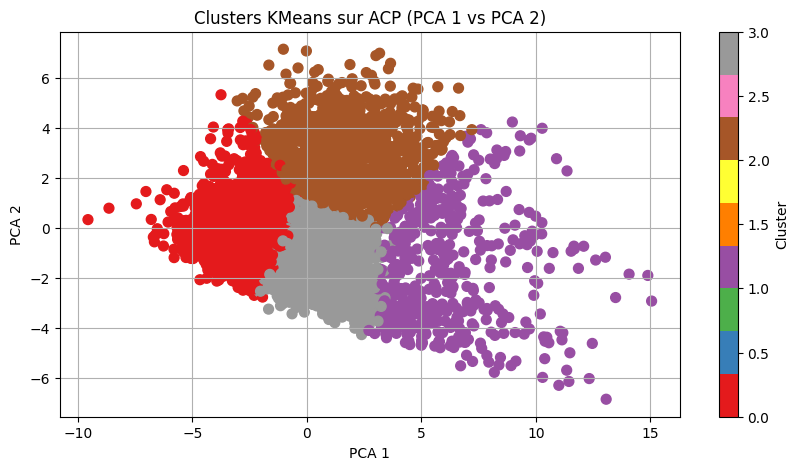

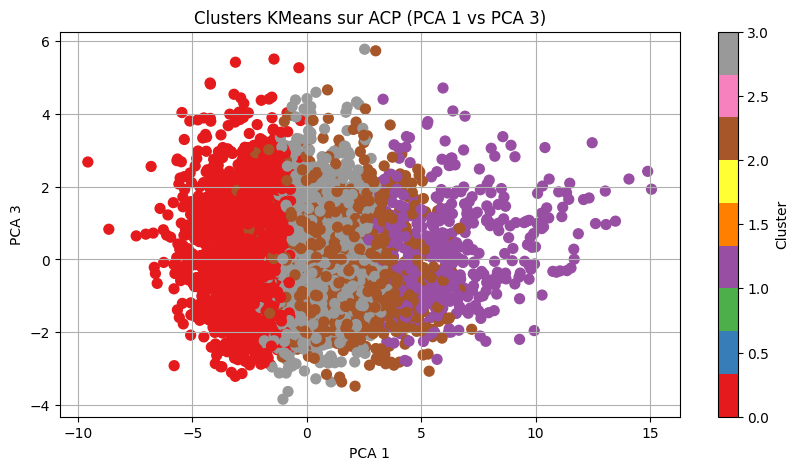

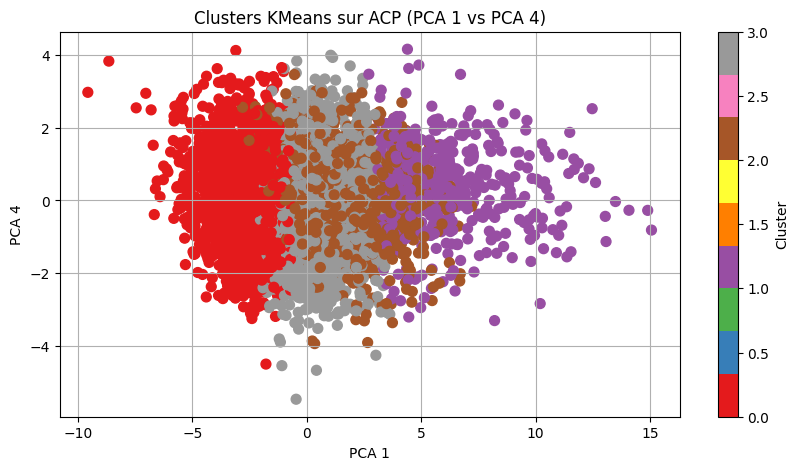

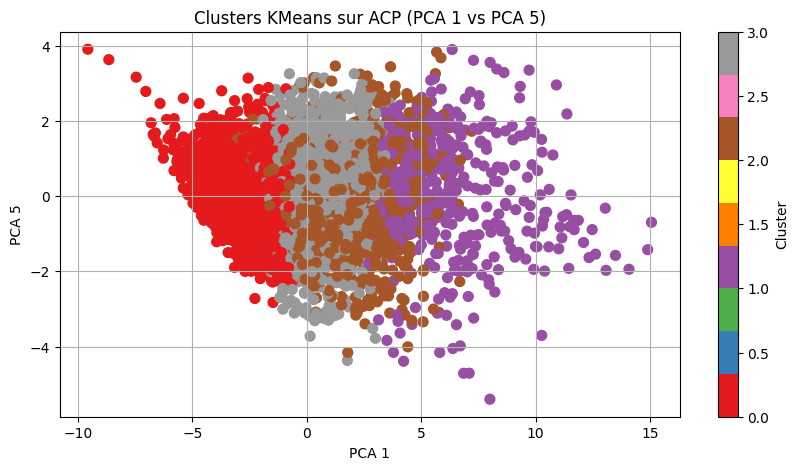

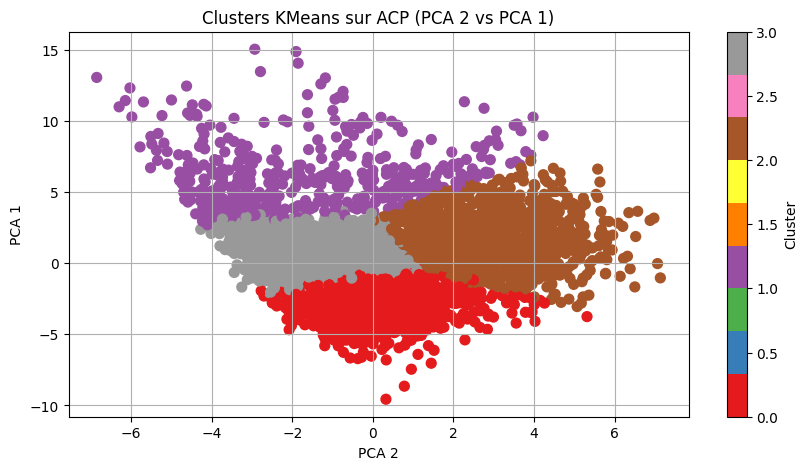

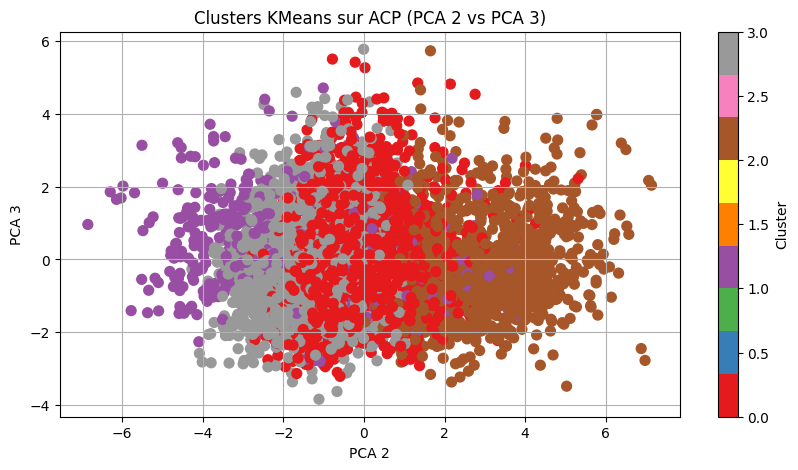

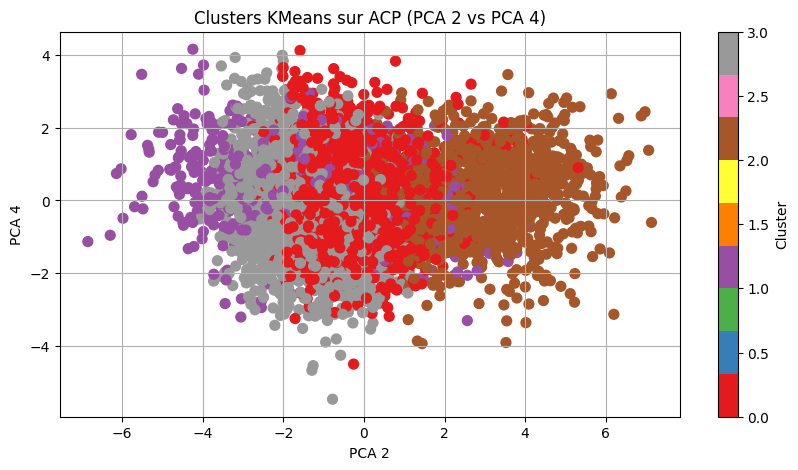

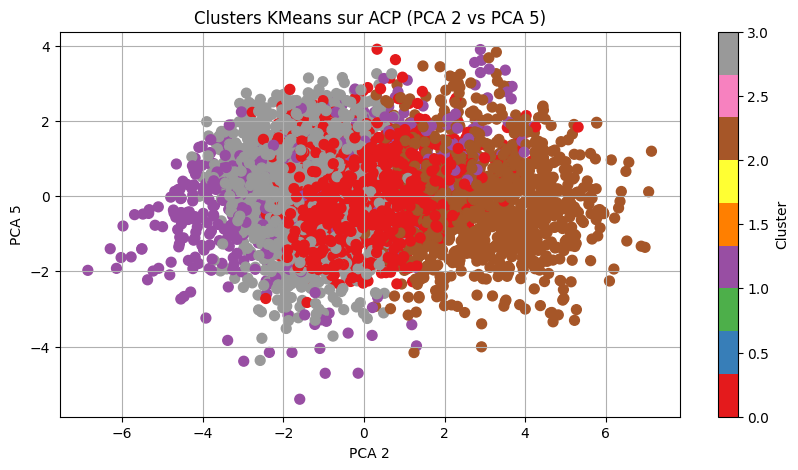

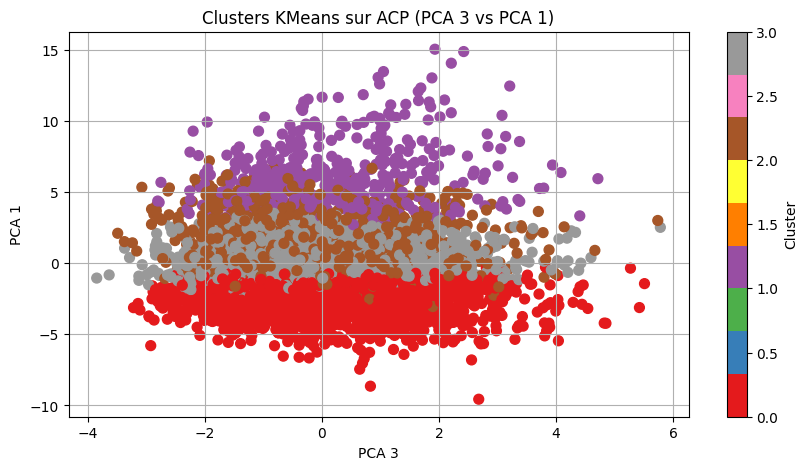

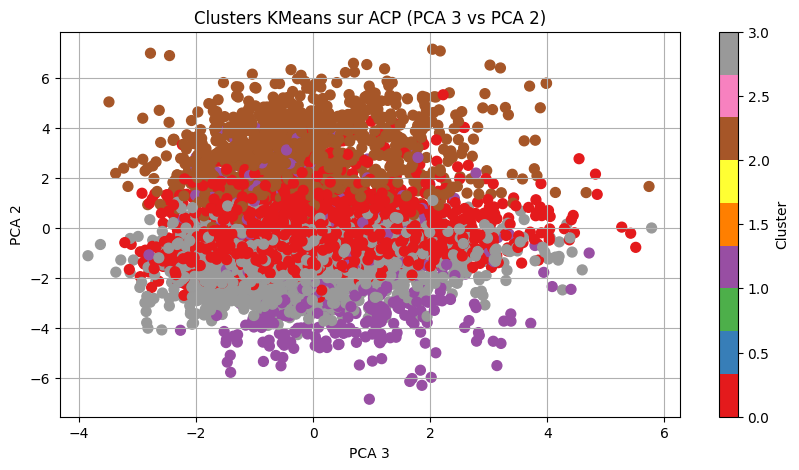

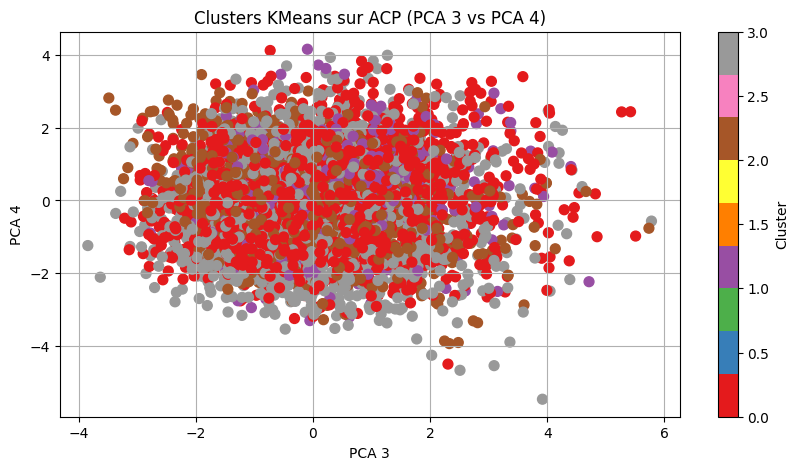

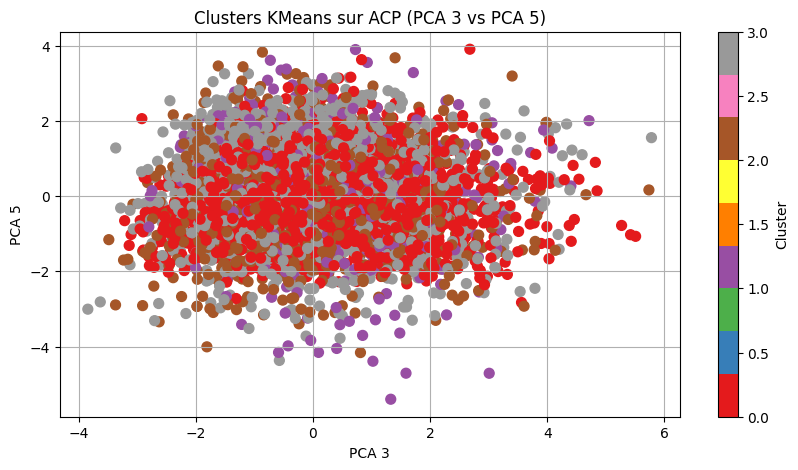

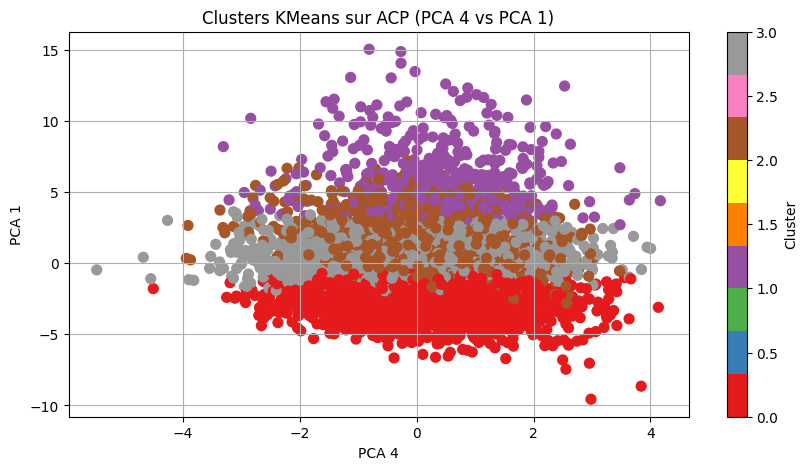

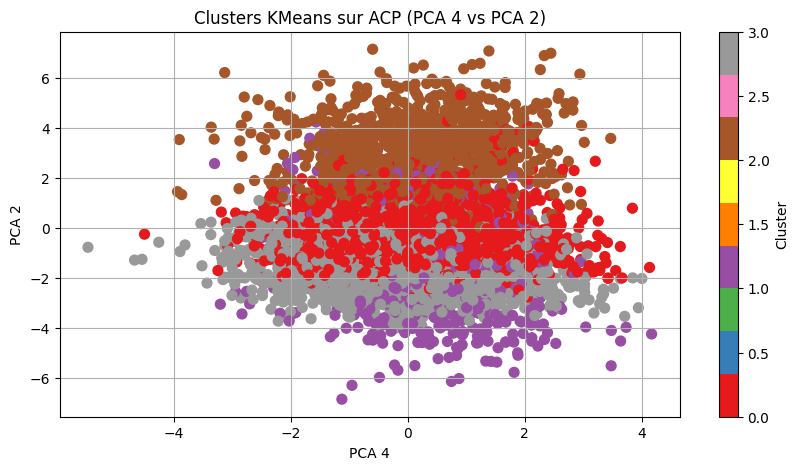

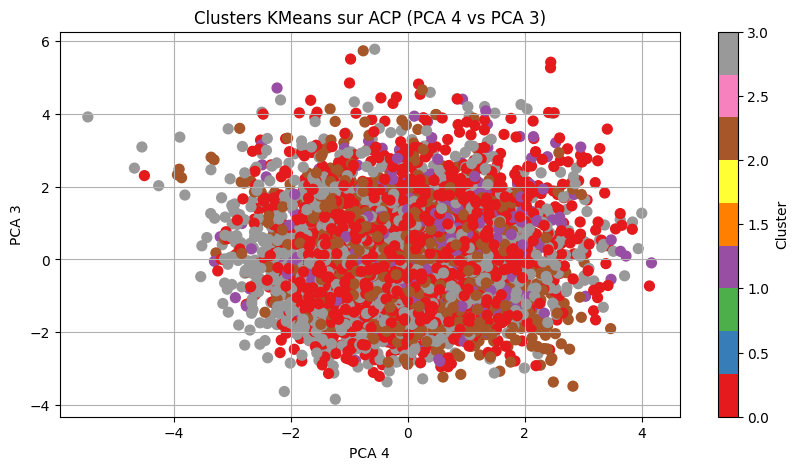

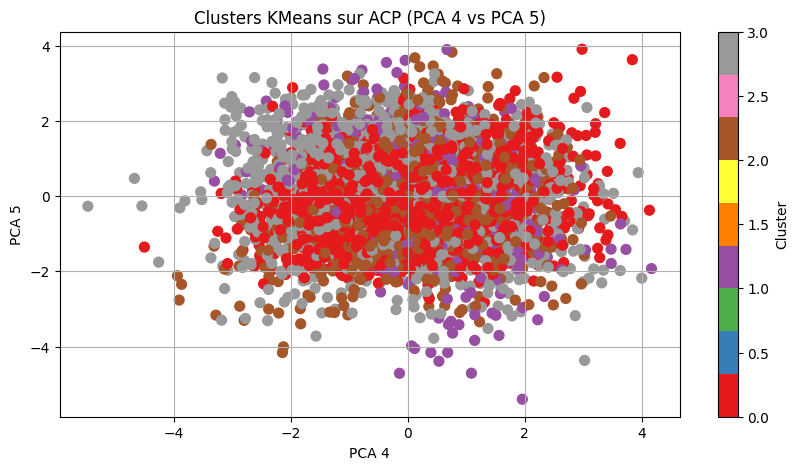

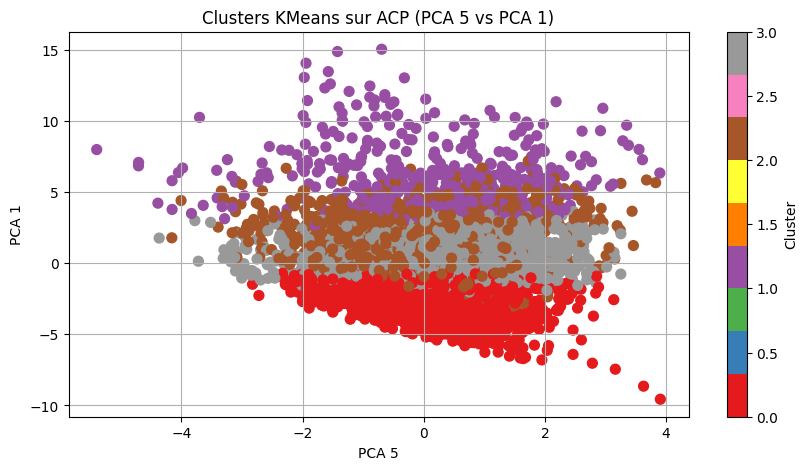

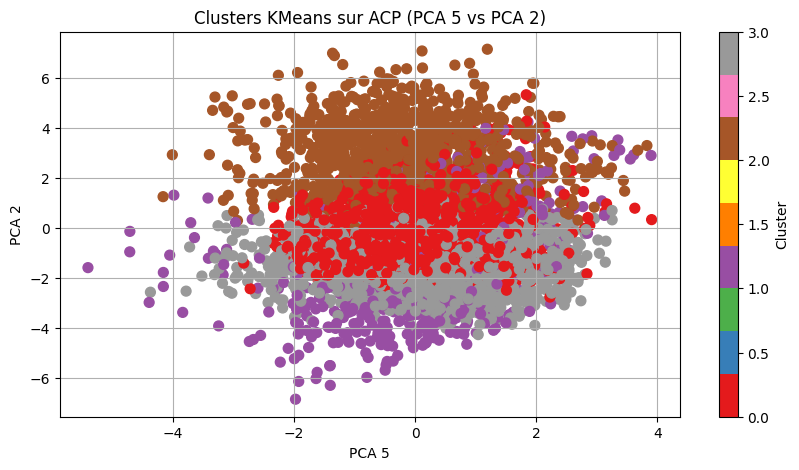

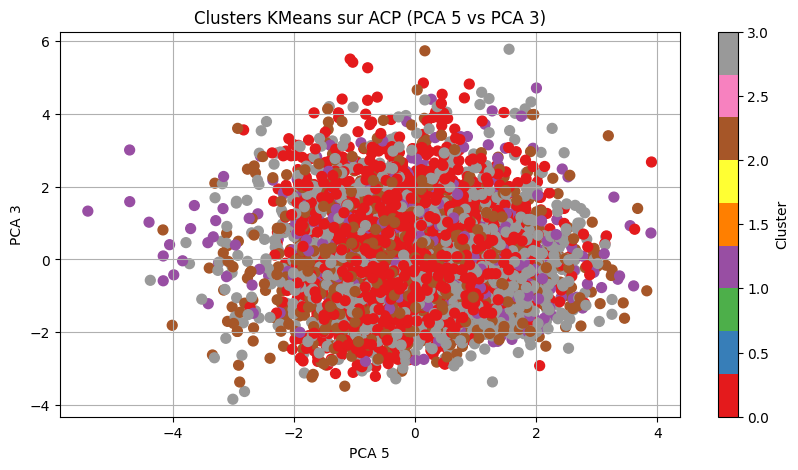

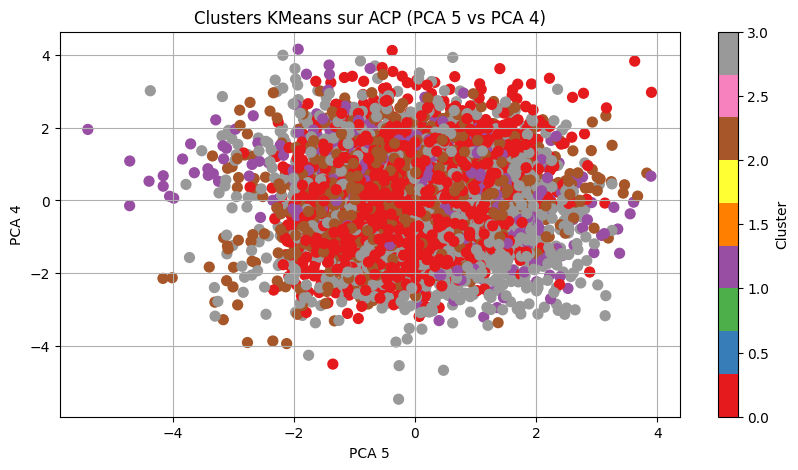

In [33]:
for i in range(5):
    for j in range(5):
        if i != j:
            plt.figure(figsize=(10, 5))
            plt.scatter(df_clusters[f'PCA{i+1}'], df_clusters[f'PCA{j+1}'], c=df_clusters['cluster'], cmap='Set1', s=50)
            plt.title(f"Clusters KMeans sur ACP (PCA {i+1} vs PCA {j+1})")
            plt.xlabel(f"PCA {i+1}")
            plt.ylabel(f"PCA {j+1}")
            plt.grid(True)
            plt.colorbar(label="Cluster")
            plt.show()

In [340]:


silhouette_avg = silhouette_score(pca_scores, labels)
print(f"Le coefficient de silhouette est : {silhouette_avg}")

Le coefficient de silhouette est : 0.023013050461380663


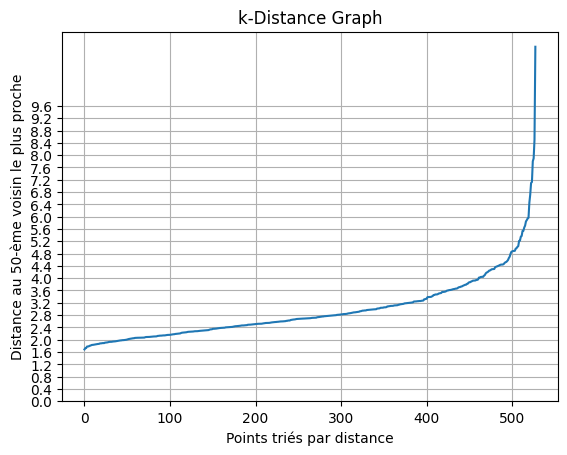

In [102]:
from sklearn.neighbors import NearestNeighbors


k = 50

# Calculer les distances aux k-voisins
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(pca_scores)
distances, indices = nbrs.kneighbors(pca_scores)

# Trier les distances
distances = np.sort(distances[:, k-1], axis=0)

# Tracer le graphique des distances
plt.plot(distances)
plt.xlabel('Points triés par distance')
plt.ylabel(f'Distance au {k}-ème voisin le plus proche')
plt.yticks(np.arange(0,10,0.4))
plt.grid(True)
plt.title('k-Distance Graph')
plt.show()

In [95]:
from sklearn.cluster import DBSCAN

max_score = {"eps": -1 , "min_sample": -1, "score": -1}

for i in np.arange(2,5,0.2):
    for j in range(10, 100, 10):
        dbscan = DBSCAN(eps=i, min_samples=j, metric='euclidean')
        cluster_labels = dbscan.fit_predict(pca_scores)
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(pca_scores, cluster_labels)
            max_score = {"eps": i , "min_sample": j, "score": max(max_score['score'], silhouette_avg)}    
            print(f"eps: {i}, min_samples: {j}, silhouette_score: {silhouette_avg}")
        
print(max_score)


eps: 2.0, min_samples: 10, silhouette_score: 0.31654188647675524
eps: 2.0, min_samples: 20, silhouette_score: 0.3101246070325745
eps: 2.0, min_samples: 30, silhouette_score: 0.24978584671694
eps: 2.0, min_samples: 40, silhouette_score: 0.21961408733656088
eps: 2.0, min_samples: 50, silhouette_score: 0.17552518695190467
eps: 2.0, min_samples: 60, silhouette_score: 0.12708913923087
eps: 2.0, min_samples: 70, silhouette_score: 0.0693541151750204
eps: 2.0, min_samples: 80, silhouette_score: -0.0315834389504147
eps: 2.0, min_samples: 90, silhouette_score: -0.0315834389504147
eps: 2.2, min_samples: 10, silhouette_score: 0.35348704807852266
eps: 2.2, min_samples: 20, silhouette_score: 0.33464661374054366
eps: 2.2, min_samples: 30, silhouette_score: 0.32522575679276045
eps: 2.2, min_samples: 40, silhouette_score: 0.2878156656206043
eps: 2.2, min_samples: 50, silhouette_score: 0.26812060627422624
eps: 2.2, min_samples: 60, silhouette_score: 0.23572586698105663
eps: 2.2, min_samples: 70, silhoue

In [112]:
dbscan = DBSCAN(eps=2.8, min_samples=50, metric='euclidean')
cluster_labels = dbscan.fit_predict(pca_scores)

In [ ]:
cluster_labels

AttributeError: 'numpy.ndarray' object has no attribute 'disinct'

In [113]:

df_clusters_db_scan = df.loc[dataset.index].copy()
df_clusters_db_scan['PCA1'] = pca_scores[:, 0]
df_clusters_db_scan['PCA2'] = pca_scores[:, 1]
df_clusters_db_scan['PCA3'] = pca_scores[:, 2]
df_clusters_db_scan['PCA4'] = pca_scores[:, 3]
df_clusters_db_scan['cluster'] = cluster_labels

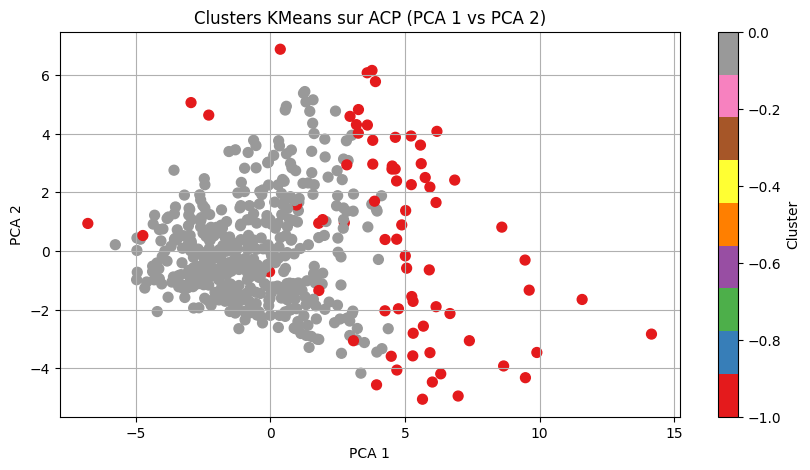

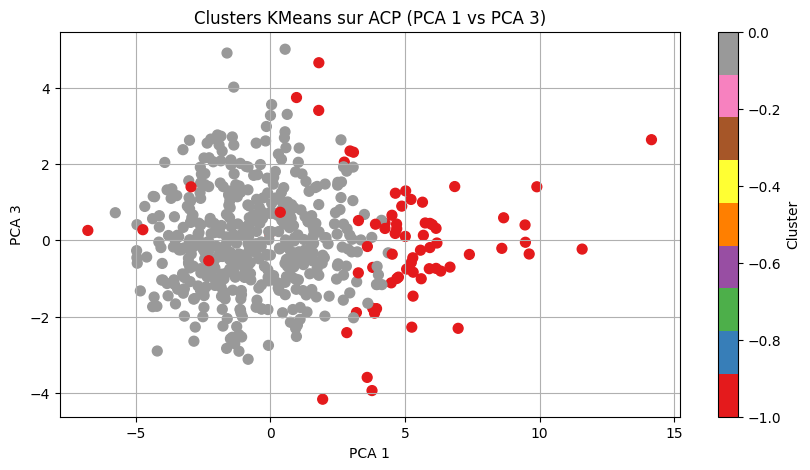

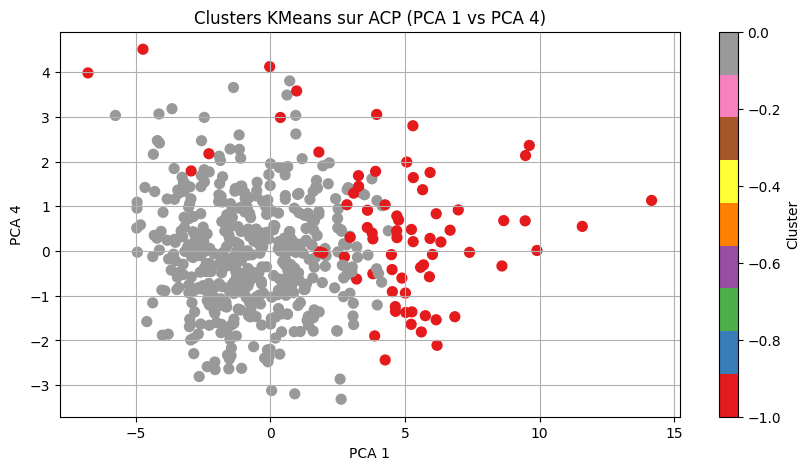

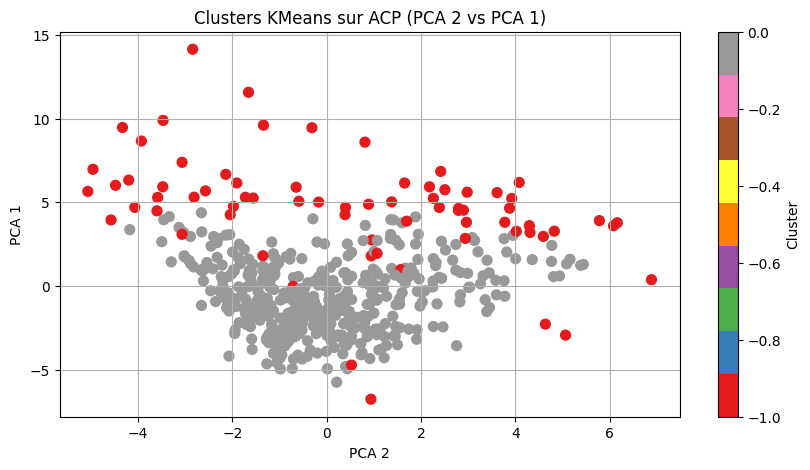

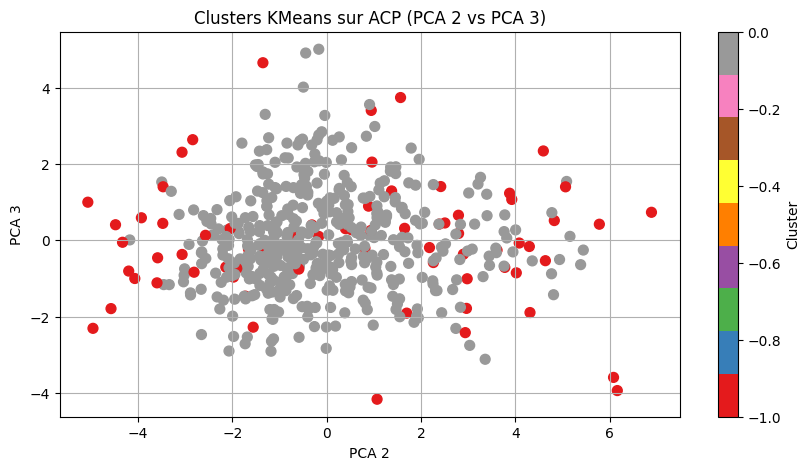

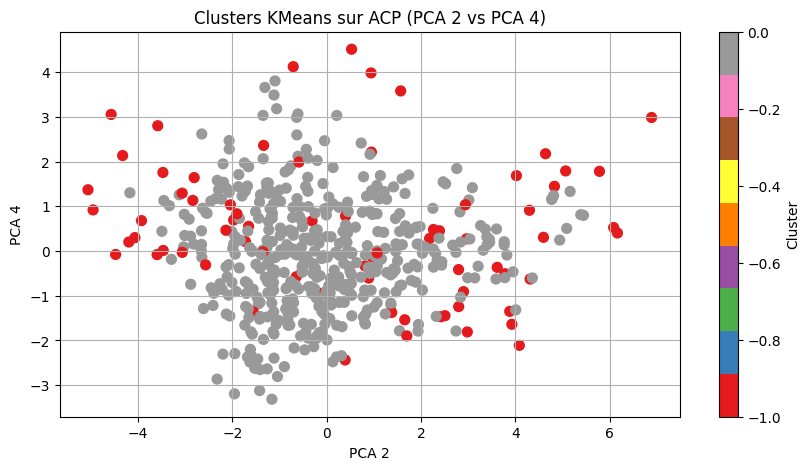

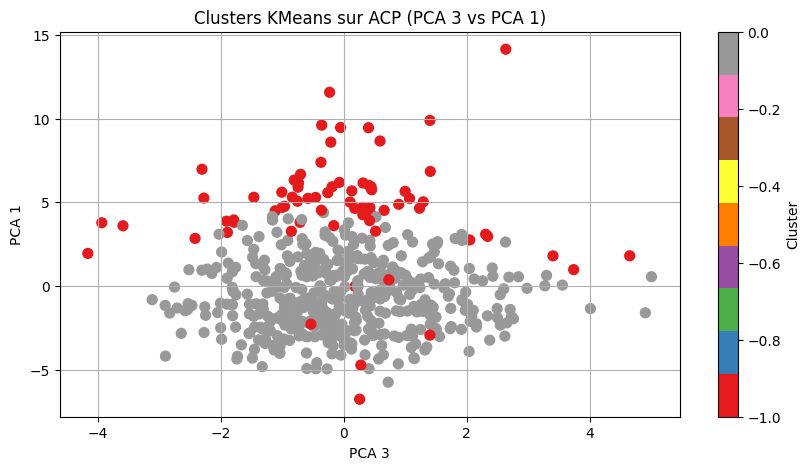

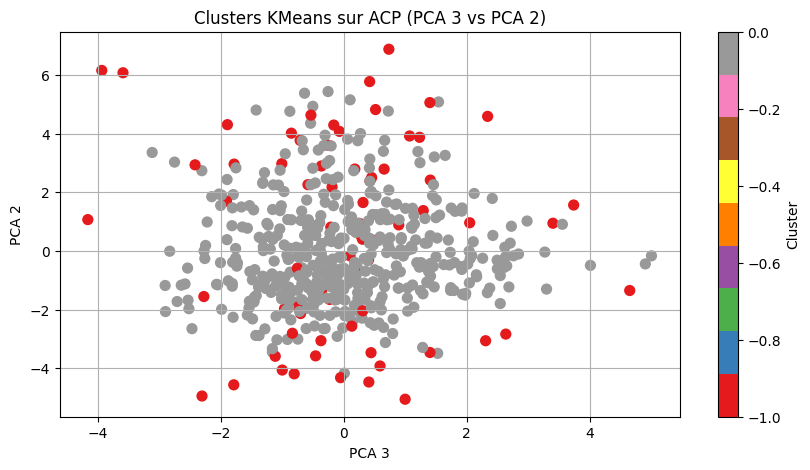

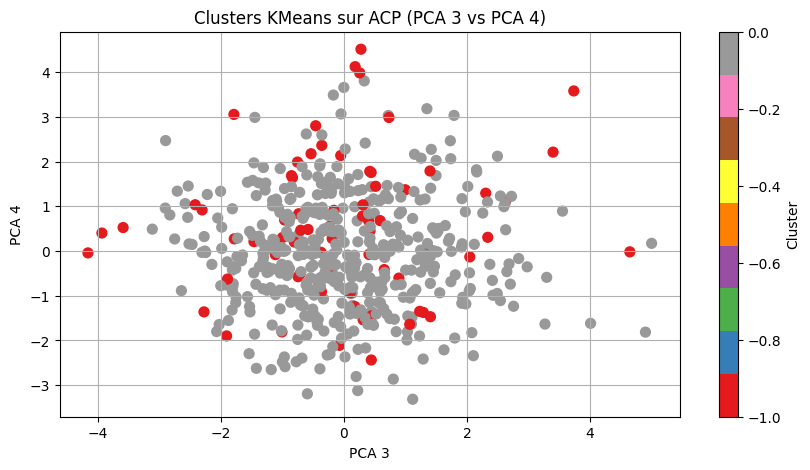

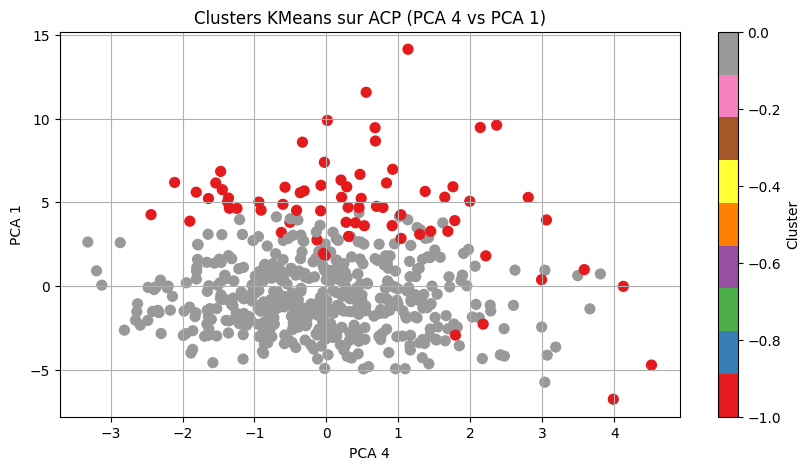

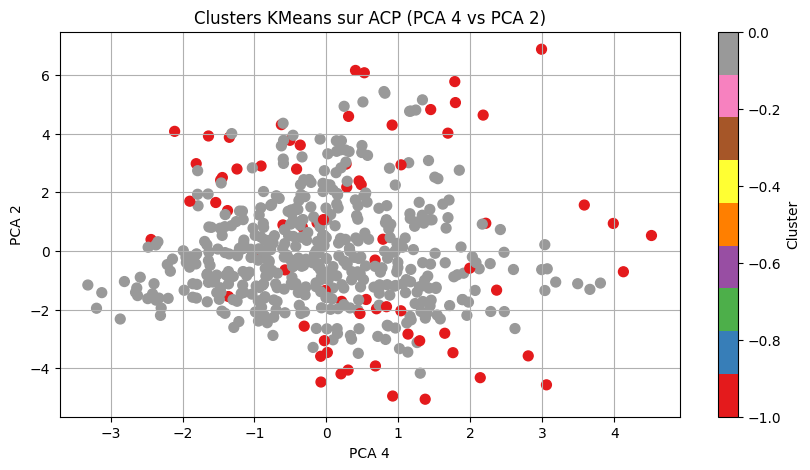

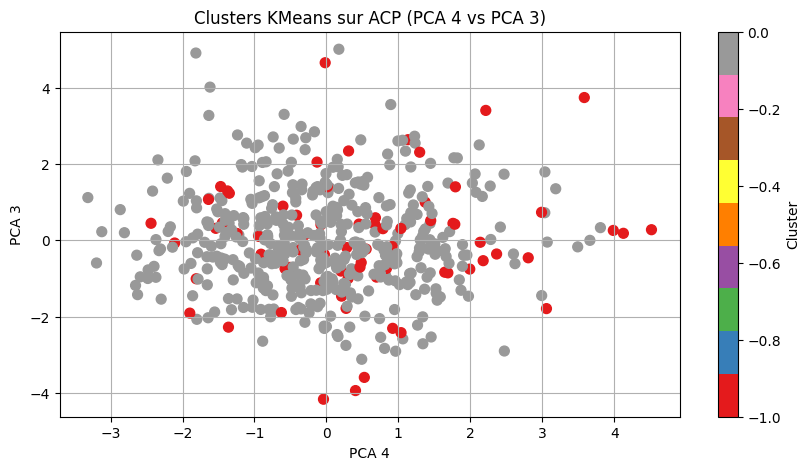

In [114]:
for i in range(4):
    for j in range(4):
        if i != j:
            plt.figure(figsize=(10, 5))
            plt.scatter(df_clusters_db_scan[f'PCA{i+1}'], df_clusters_db_scan[f'PCA{j+1}'], c=df_clusters_db_scan['cluster'], cmap='Set1', s=50)
            plt.title(f"Clusters KMeans sur ACP (PCA {i+1} vs PCA {j+1})")
            plt.xlabel(f"PCA {i+1}")
            plt.ylabel(f"PCA {j+1}")
            plt.grid(True)
            plt.colorbar(label="Cluster")
            plt.show()

In [122]:
from sklearn.cluster import HDBSCAN
clusterer = HDBSCAN(min_cluster_size=100)
cluster_labels = clusterer.fit_predict(pca_scores)

In [123]:
df_clusters_hdb_scan = df.loc[dataset.index].copy()
df_clusters_hdb_scan['PCA1'] = pca_scores[:, 0]
df_clusters_hdb_scan['PCA2'] = pca_scores[:, 1]
df_clusters_hdb_scan['PCA3'] = pca_scores[:, 2]
df_clusters_hdb_scan['PCA4'] = pca_scores[:, 3]
df_clusters_hdb_scan['cluster'] = cluster_labels

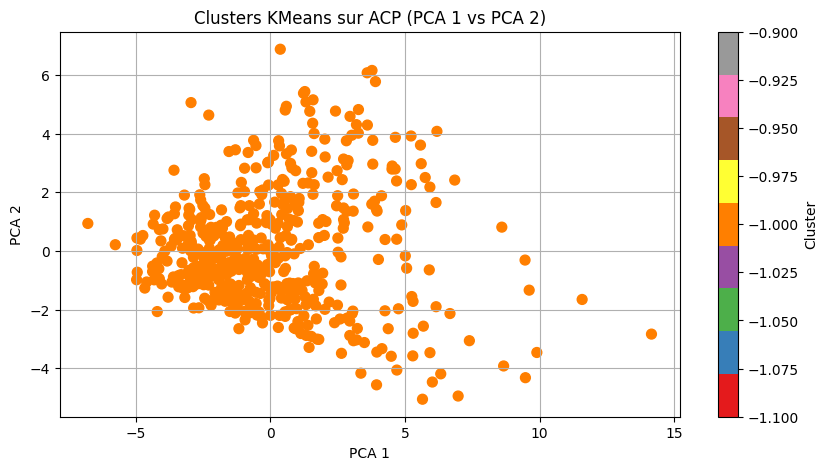

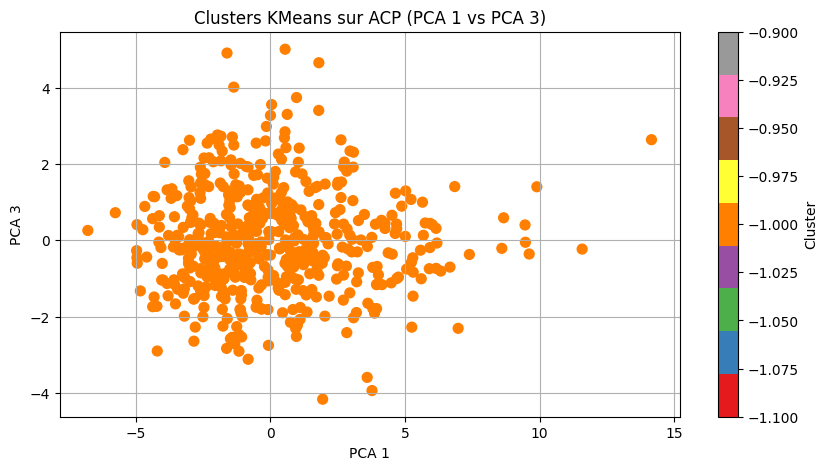

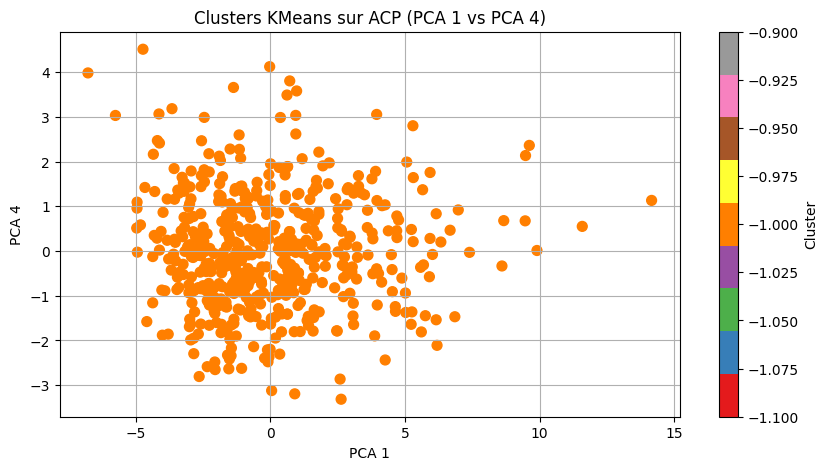

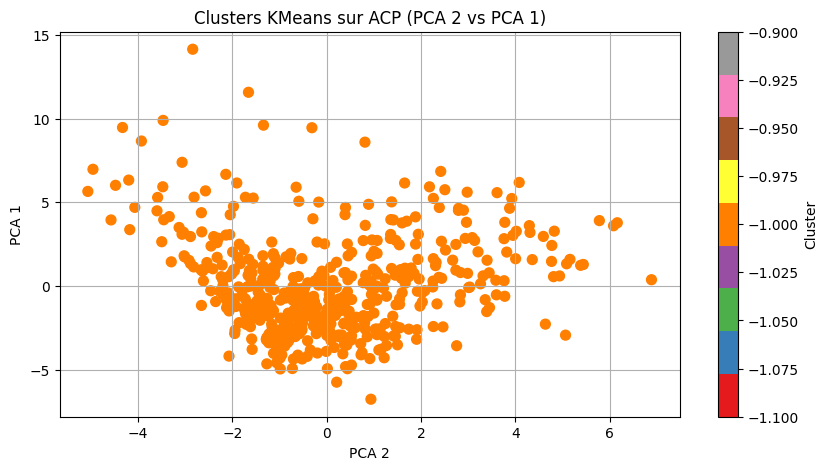

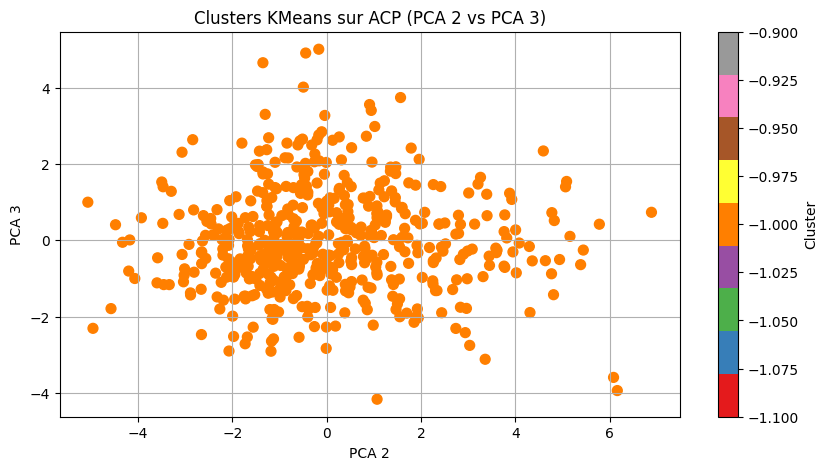

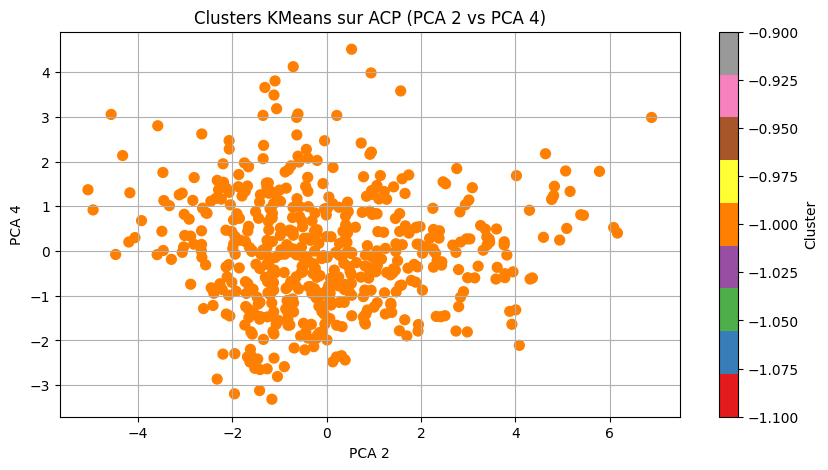

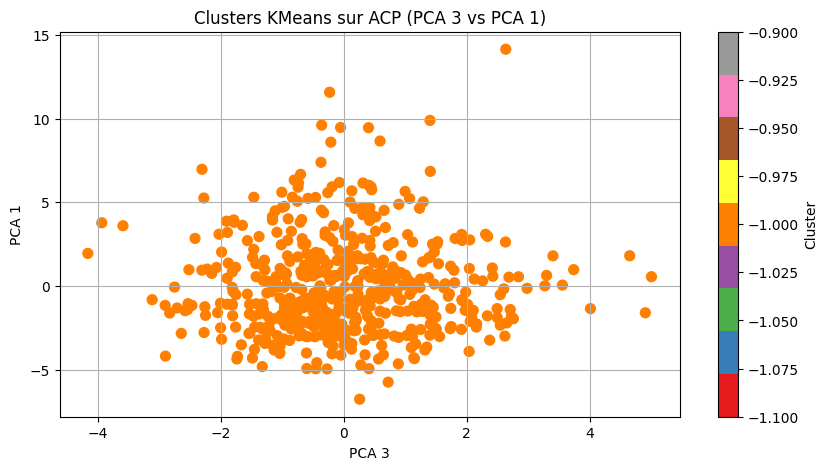

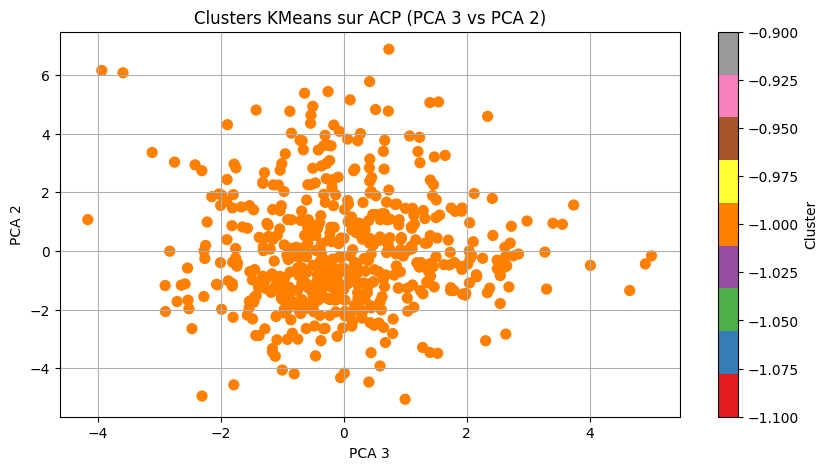

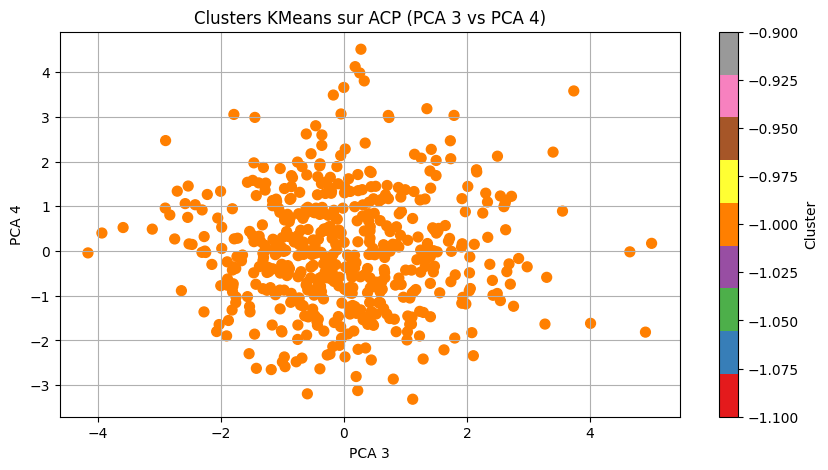

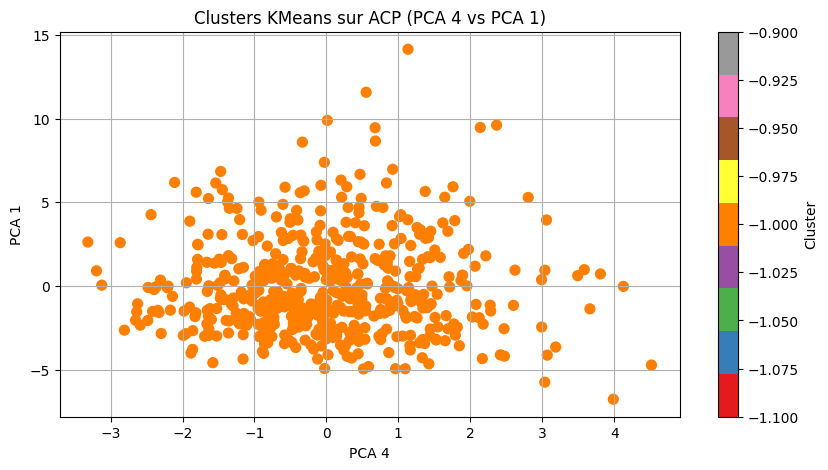

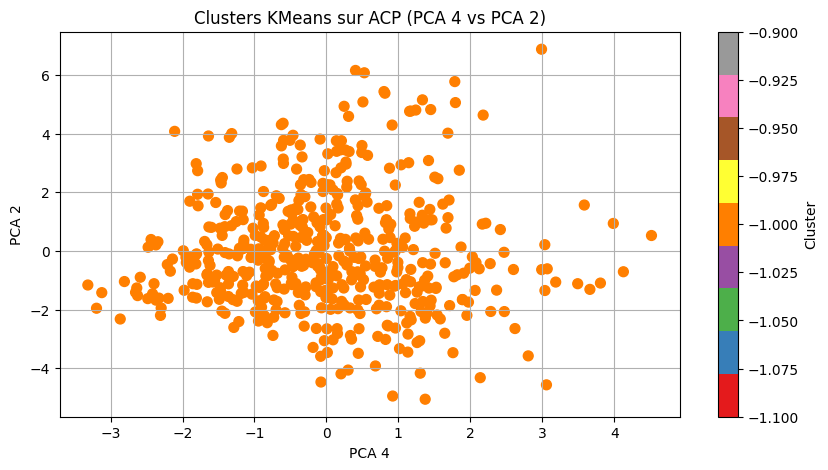

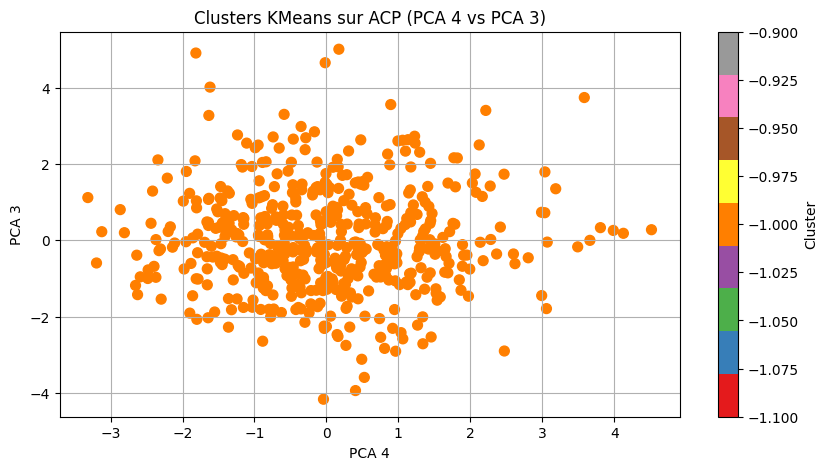

In [124]:
for i in range(4):
    for j in range(4):
        if i != j:
            plt.figure(figsize=(10, 5))
            plt.scatter(df_clusters_hdb_scan[f'PCA{i+1}'], df_clusters_hdb_scan[f'PCA{j+1}'], c=df_clusters_hdb_scan['cluster'], cmap='Set1', s=50)
            plt.title(f"Clusters KMeans sur ACP (PCA {i+1} vs PCA {j+1})")
            plt.xlabel(f"PCA {i+1}")
            plt.ylabel(f"PCA {j+1}")
            plt.grid(True)
            plt.colorbar(label="Cluster")
            plt.show()